# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2023
## Робастная статистика. Доверительное оценивание.

In [ ]:
import numpy as np
from scipy import stats as sps
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as sps
sns.set(style="darkgrid", font_scale=1.4)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


*Условие задания*: Великая ордалия продолжает свой путь на север, однако адепты доселе неизвестной магии - Текне используют своё искусство, чтобы вмешаться в отлаженную работу имперских статистических оценок параметров, меняя им часть данных. Теперь необходимо давать такие оценки, которые выдержат фокусы волшебников консульта, чтобы Ордалия смогла дойти до Голготтерата!

Судьба многомилионной армии теперь в Ваших руках!

## Задача 1

Эта задача посвящена *робастному* оцениванию. Это такой раздел статистики, который изучает, как сильно оценки зависят от выбросов и других *неверных* данных и как построить оценки, которые выдерживают шумы.

1) Сгенерируйте выборку из трех распределений: нормального, Лапласа и Коши размера `N=500`.

Далее для всех графиков в этом задании используйте обозначенные цвета для каждого из распределений (даже если графики будут на разных осях). То есть если график касается нормального распределения то рисуйте его синим цветом.

In [ ]:
normal_color = 'b'
laplace_color = 'r'
cauchy_color = 'g'
N = 500

sample_normal = sps.norm().rvs(size=N)
sample_laplace = sps.laplace().rvs(size=N)
sample_cauchy = sps.cauchy().rvs(size=N)

2) Постройте график плотности распределения для всех трех распределений на одних осях.

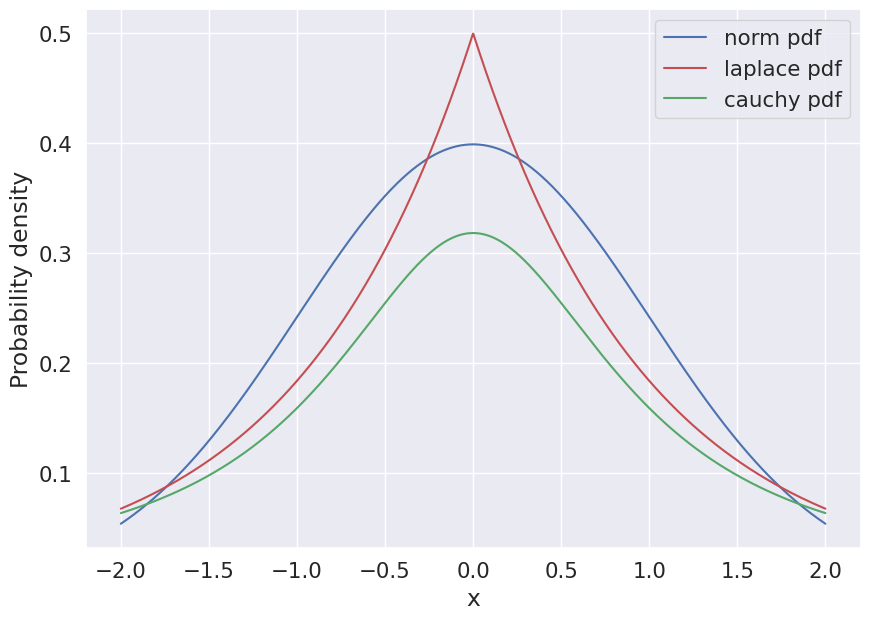

In [ ]:
x = np.linspace(-2, 2, 2000)
plt.figure(figsize=(10, 7))
plt.plot(x, sps.norm().pdf(x), color=normal_color, label='norm pdf')
plt.plot(x, sps.laplace().pdf(x), color=laplace_color, label='laplace pdf')
plt.plot(x, sps.cauchy().pdf(x), color=cauchy_color, label='cauchy pdf')
plt.xlabel('x')
plt.ylabel('Probability density')
plt.legend()

1) Мы будем оценивать параметр сдвига каждого из распределений. Сделайте предположение о том, для каких распределений параметр сдвига будет оценён точнее при помощи среднего и медианы. Докажите Ваши предположения теоретически и экспериментально. Моделировать оценки в этот раз не нужно, достаточно по одной выборке произвести оценивание и проверить его точность.

**Ответ:** Логично предположить, что оценка медианой будет лучше всего для распределения Коши, потому что его параметр сдвига $x_0$ - и есть медиана (но мы тут рассматриваем не просто медиану распределения, а выборочную медиану, поэтому это предположение надо проверить на практике). А вот оценка средним должна быть лучше для нормального распределения, потому что это оценка получается из метода максимального правдоподобия ($n ⋅ (\overline{X} - θ) = 0$), а по теореме, связанной с этим методом, мы получаем, что она будет состоятельной.

In [ ]:
#Эксперименты с оценкой средним и медианы
mean_normal = np.mean(sample_normal)
median_normal = np.median(sample_normal)
mean_laplace = np.mean(sample_laplace)
median_laplace = np.median(sample_laplace)
mean_cauchy = np.mean(sample_cauchy)
median_cauchy = np.median(sample_cauchy)
print("Оценки средним для нормального, Лапласа, Коши: ", mean_normal, mean_laplace, mean_cauchy)
print("Оценки медианой для нормального, Лапласа, Коши: ",median_normal, median_laplace, median_cauchy)

Оценки средним для нормального, Лапласа, Коши:  -0.04183487594206119 -0.071874600107784 1.2193254133226883
Оценки медианой для нормального, Лапласа, Коши:  -0.06644446166367125 -0.07376723716684953 0.037071575834596526


По практическому эксперименту видим, что наша теория подтвердилась и действительно оценка средним лучше для нормального распределения, а медианой непосредственно для распределения Коши. Для распределения Лапласа обе эти оценки являются не очень хорошими, но и не плохими.

3) Часто, в реальной жизни, мы сталкиваемся с данными в которых есть выбросы возникшие, например, из-за опечаток. Пусть в выборке содержится 99 точек на интервале $[0;1]$ и один элемент равный 300. Тогда среднее значение нашей выборки будет не меньше трех. Ясно, что так дело не пойдет, что же делать?

Можно использовать медиану или **усеченное среднее**.

**Усеченное среднее порядка $\alpha$** это среднее составленное из выборки от которой отрезаны $\alpha$ и $1 - \alpha$ квантили. Как ее получить?


1.   Отсортировать выборку
2.   Отрезать первые и последние ($\alpha \cdot \text{размер выборки}$) элементов выборки
3.   Посчитать среднее полученной выборки

Напишите функцию для подсчета этой статистики. Реализуйте усечённое среднее для одной выборки, но разных $\alpha$. На одних осях постройте распределение оценки для разных $\alpha$. Как оно изменяется?

In [ ]:
import math

def truncated_mean(sample, alpha=0.3):
  sample.sort()
  size = len(sample)
  sample = sample[int(alpha * size) : int((1 - alpha) * size)]
  truncated_mean = np.mean(sample)
  return truncated_mean

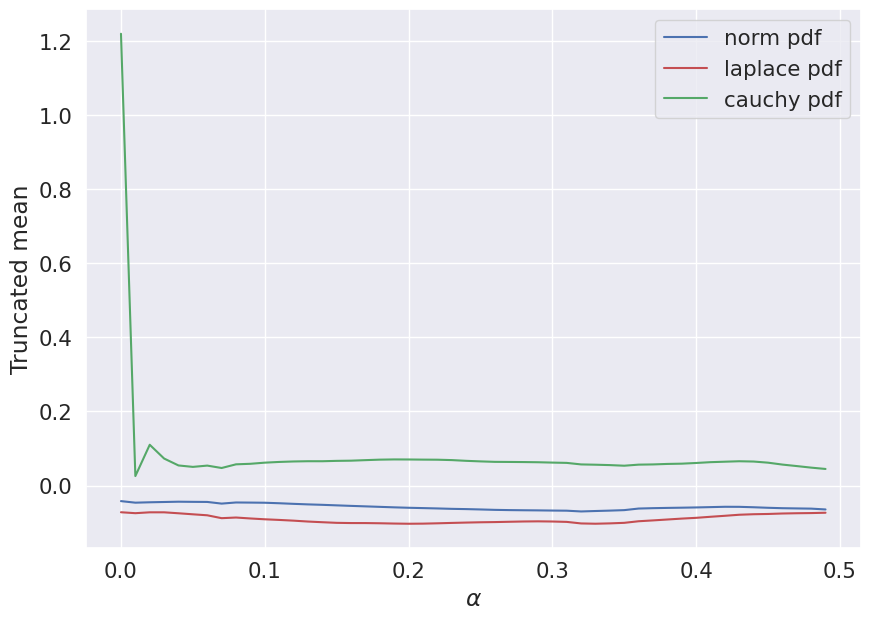

In [ ]:
alpha = np.arange(0, 0.5, 0.01)
plt.figure(figsize=(10, 7))
mean1 = []
mean2 = []
mean3 = []
for i in alpha:
  mean1.append(truncated_mean(sample_normal, i))
  mean2.append(truncated_mean(sample_laplace, i))
  mean3.append(truncated_mean(sample_cauchy, i))
plt.plot(alpha, mean1, color=normal_color, label='norm pdf')
plt.plot(alpha, mean2, color=laplace_color, label='laplace pdf')
plt.plot(alpha, mean3, color=cauchy_color, label='cauchy pdf')
plt.xlabel(r'$\alpha$')
plt.ylabel('Truncated mean')
plt.legend()

Видим, что усеченное среднее для нормального распределения и распределения Лапласа практически не изменяется (то есть почти вырождается в прямую), в то время как усеченное среднее для распределения Коши с ростом α тоже растет. Но при этом несложно увидеть, что с ростом этого α все оценки усеченного среднего для каждого распределения стремятся к истинному значению параметра, то есть к нулю.

4) Постройте график квадрата разности каждой из оценок и истинного значения параметра в зависимости от роста размера выборки для разных $\alpha$. Сделайте выводы, какие оценки точнее.

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


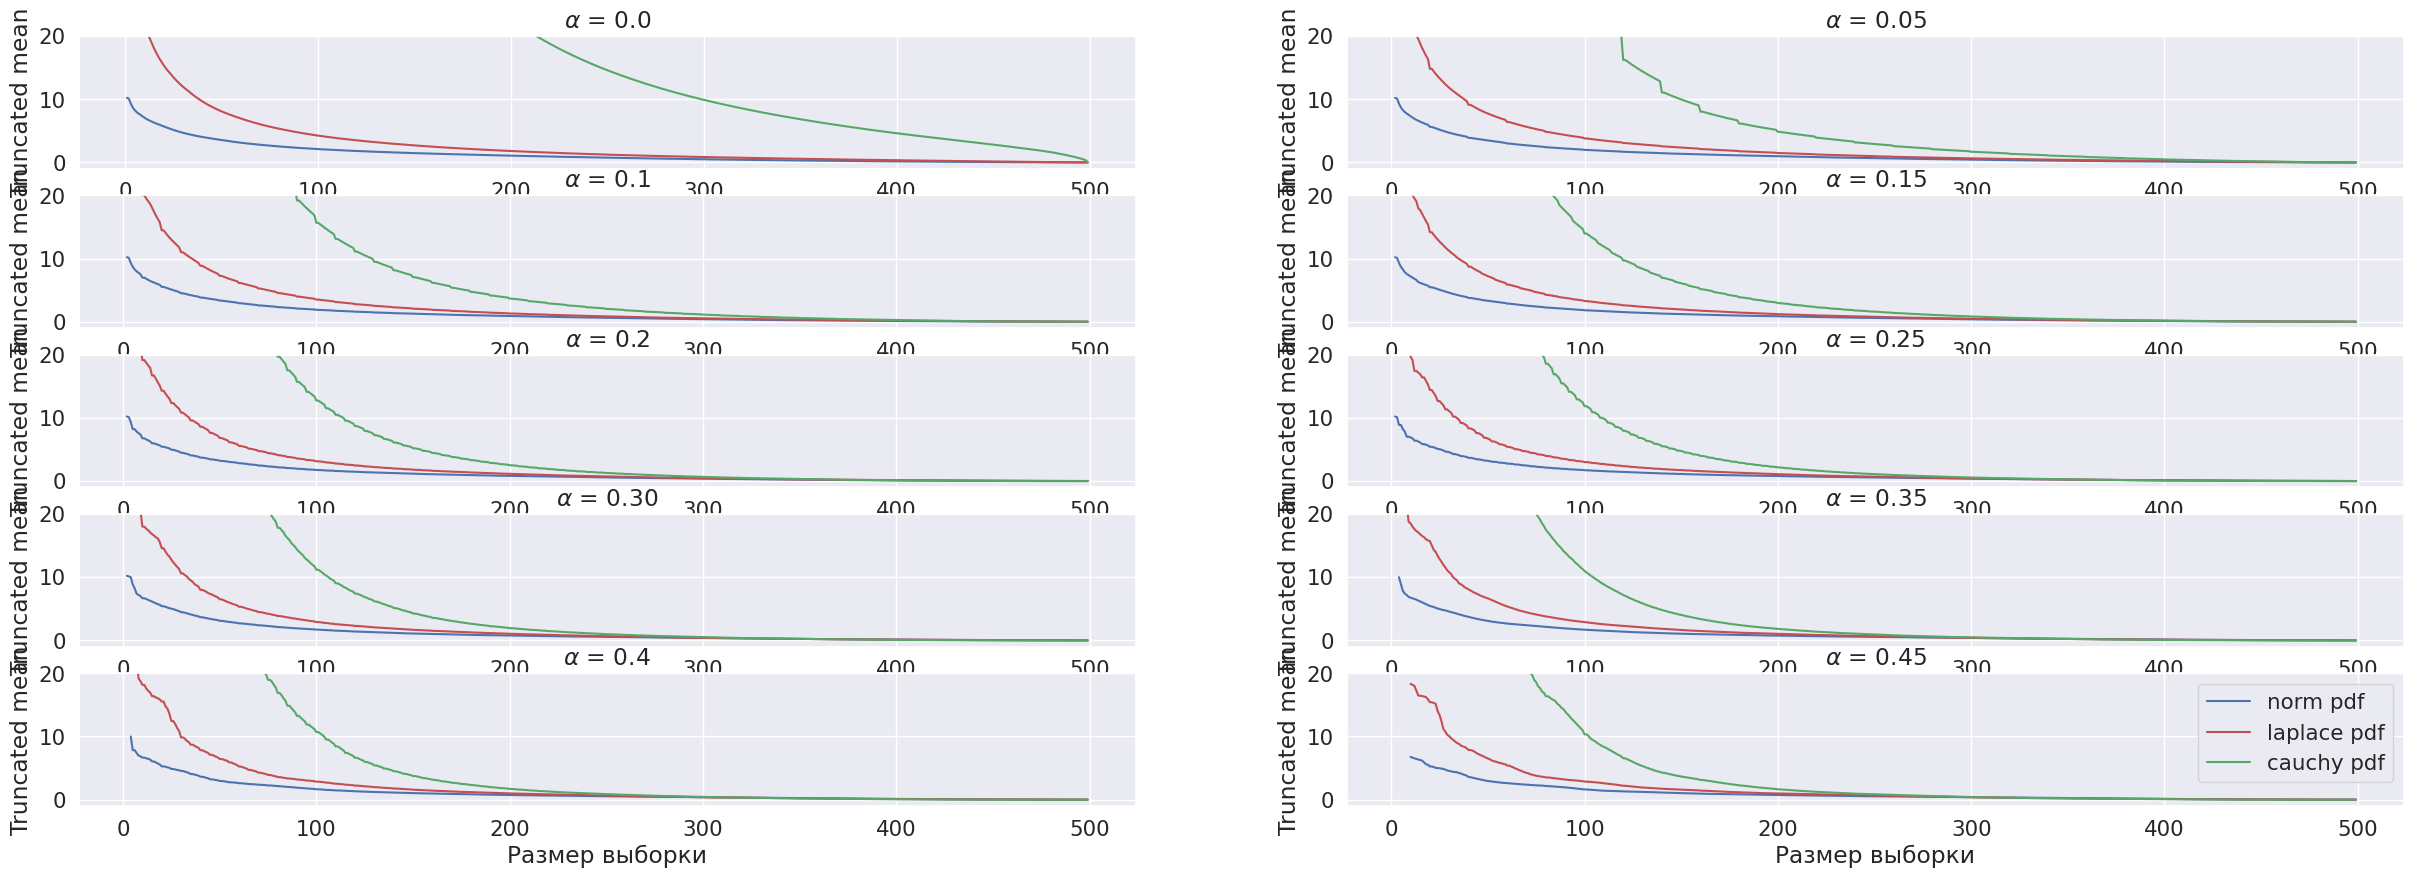

In [ ]:
alpha = np.arange(0, 0.5, 0.05)
plt.figure(figsize=(30, 10))
for i in range(len(alpha)):
  mean1 = []
  mean2 = []
  mean3 = []
  for j in range(N):
    mean1.append(truncated_mean(sample_normal[:j], alpha[i]) ** 2)
    mean2.append(truncated_mean(sample_laplace[:j], alpha[i]) ** 2)
    mean3.append(truncated_mean(sample_cauchy[:j], alpha[i]) ** 2)
  plt.subplot(5, 2, i + 1)
  x = np.arange(0, N)
  plt.plot(x, mean1, color=normal_color, label='norm pdf')
  plt.plot(x, mean2, color=laplace_color, label='laplace pdf')
  plt.plot(x, mean3, color=cauchy_color, label='cauchy pdf')
  plt.ylim([-1, 20])
  plt.xlabel('Размер выборки')
  plt.ylabel('Truncated mean')
  plt.title(r'$\alpha$ = ' + str(alpha[i])[:4])
plt.legend()

По этим графикам видно, что чем больше α, тем быстрее оценка усеченным средним (по крайней мере для распределения Коши) сходится до истинного значения. Также видим, что с увеличением размера выборки эта оценка тоже стремится к истинному значению.

**Теорема**
Пусть распределение симметрично относительно нуля и имеет одну моду в нуле, тогда асимптотическая дисперсия усеченного среднего порядка $\alpha$ может быть выражена по формуле:
$$
\sigma^2(\alpha) = 2\cdot\frac{\int_0^{u_{1 - \alpha}} x^2 dF(x) + \alpha\cdot(u_{1 - \alpha})^2}{(1 - 2\alpha)^2},
$$

где $u_\alpha$ – квантиль порядка $\alpha$.

Вычислите дисперсию и постройте график дисперсии в зависимости от $\alpha$.

*Подсказка.* Для численного интегрирования используйте функцию `quad` из модуля `scipy.integrate`

In [ ]:
from scipy.integrate import quad

def asymp_disp(distr, alpha):
    quantile = distr.ppf(1 - alpha)
    integr, a = quad(lambda x : distr.pdf(x) * x ** 2, 0, quantile)
    sigma = 2 * (integr + alpha * (quantile**2)) / (1 - 2 * alpha)**2
    return sigma

4.5) Дополнительный пункт на 5 баллов.

Докажите предложенную теорему.

5) Постройте графики для асимптотической дисперсии в зависимости от $\alpha$ для всех трех распределений на назных осях (используйте `plt.subplots(1, 3, figsize=(21,7))`). **Не забудьте про цвета**. Для загаловка графика используйте `ax[i].set_title`, для заголовка всей картинки используйте `fig.suptitle`. Сравните результаты с теоретической

<ipython-input-8-709a6906c422>:6: RuntimeWarning: invalid value encountered in double_scalars
  sigma = 2 * (integr + alpha * (quantile**2)) / (1 - 2 * alpha)**2


Text(0.5, 0.98, 'asymptotic variance with alpha')

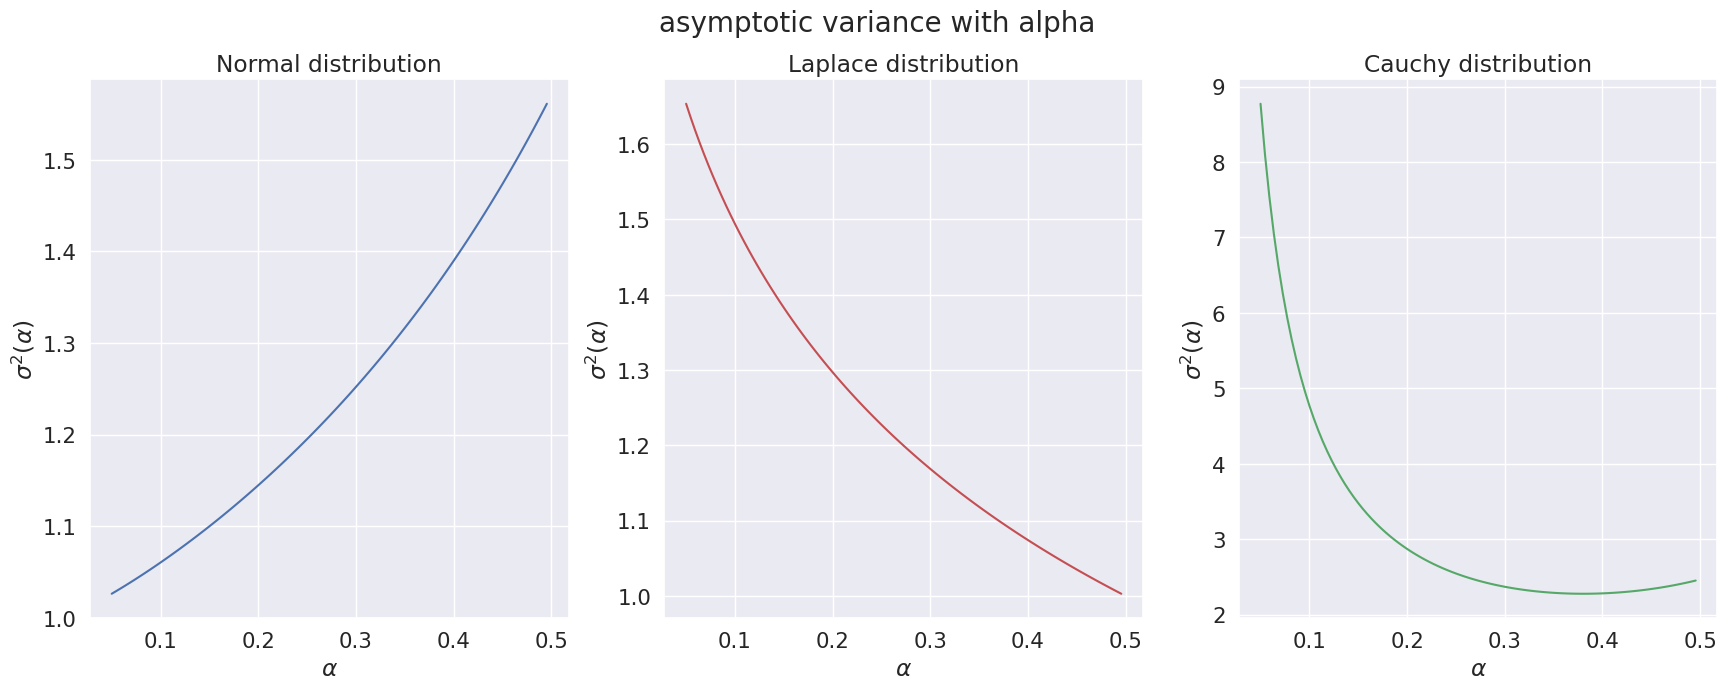

In [ ]:
alpha = np.linspace(0.05, 0.5, 100)

fig, ax = plt.subplots(1, 3, figsize=(21,7))
for i in range(0, 3, 1):
    ax[i].set_xlabel(r'$\alpha$')
    ax[i].set_ylabel(r'$\sigma^2(\alpha)$')

ax[0].plot(alpha, [asymp_disp(sps.norm(), i) for i in alpha], color=normal_color)
ax[0].set_title('Normal distribution')
ax[1].plot(alpha, [asymp_disp(sps.laplace(), i) for i in alpha], color=laplace_color)
ax[1].set_title('Laplace distribution')
ax[2].plot(alpha, [asymp_disp(sps.cauchy(), i) for i in alpha], color=cauchy_color)
ax[2].set_title('Cauchy distribution')
plt.suptitle('asymptotic variance with alpha', fontsize=20)

Мы можем увидеть, что наилучшая оценка (с минимальной дисперсией) для нормального распределения достигается в левом краю, то есть где квантиль 0 (то есть просто средее). Для распределения Лапласа в квантиле 0.5, правом краю (то есть медиана). Для распределения Коши ни одна из этих оценок не дала хороших результатов, но судя по графику лучше брать усеченное среднее порядка 0.35.

6) Breakdown point в статистике называется такое наибольшее число x от 0 до 100, что если изменить x% значений выборки, то значение оценки не потеряет в точности. Эквивалентно, если заменить хотя бы x+1% значений, можно получить сколь угодно плохую оценку.

Предположите, как Breakdown point зависит параметра $\alpha$.

Ответ:

И проверьте своё предположение моделированием. Будем считать, что вместо произвольных x% выборки будет записано какое-то заранее подобранное достаточно большое число с положительным или отрицательным знаком.

In [ ]:
num = -1000
x = np.ceil(np.linspace(0, 100, 20) / 100 * N)

А теперь проверим оценки усеченным средним на разных альфа!

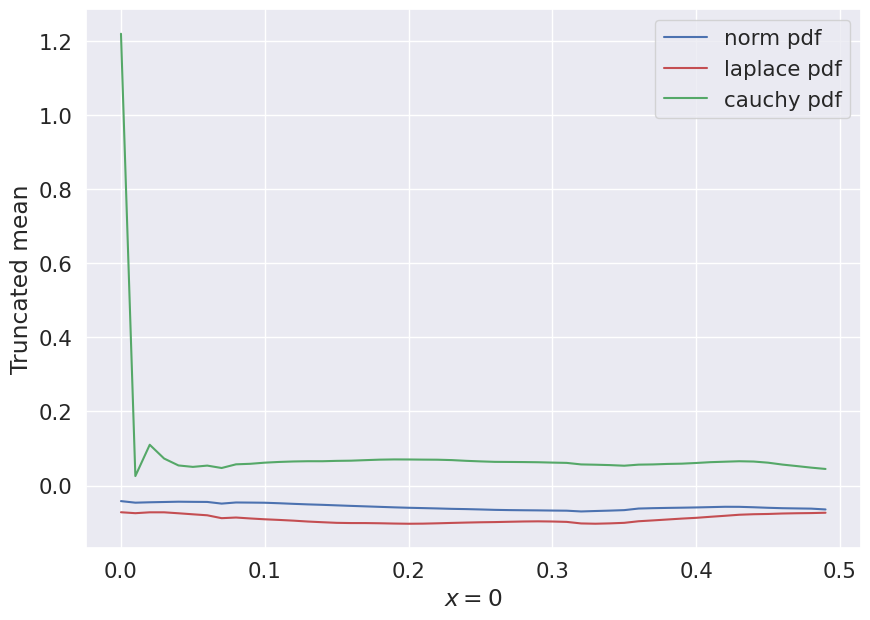

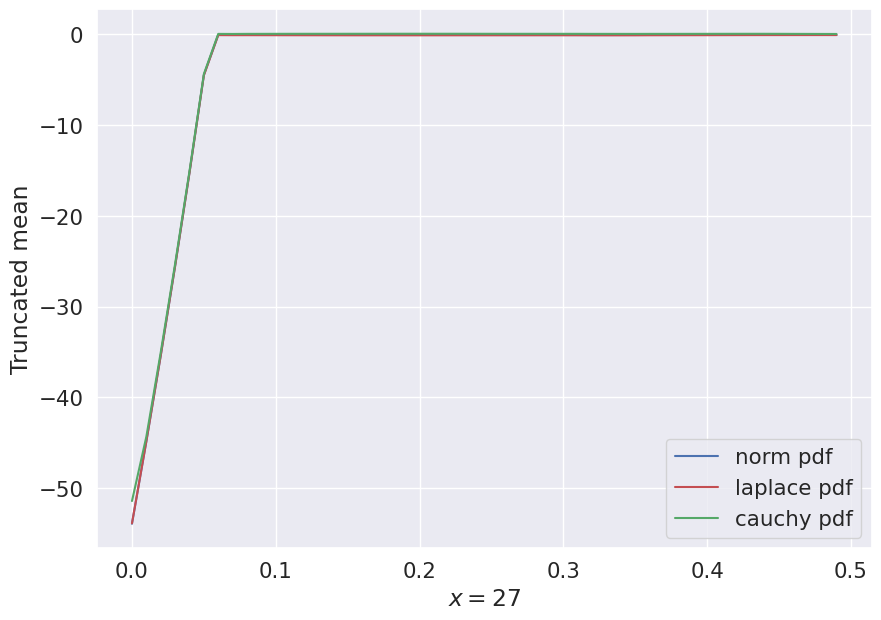

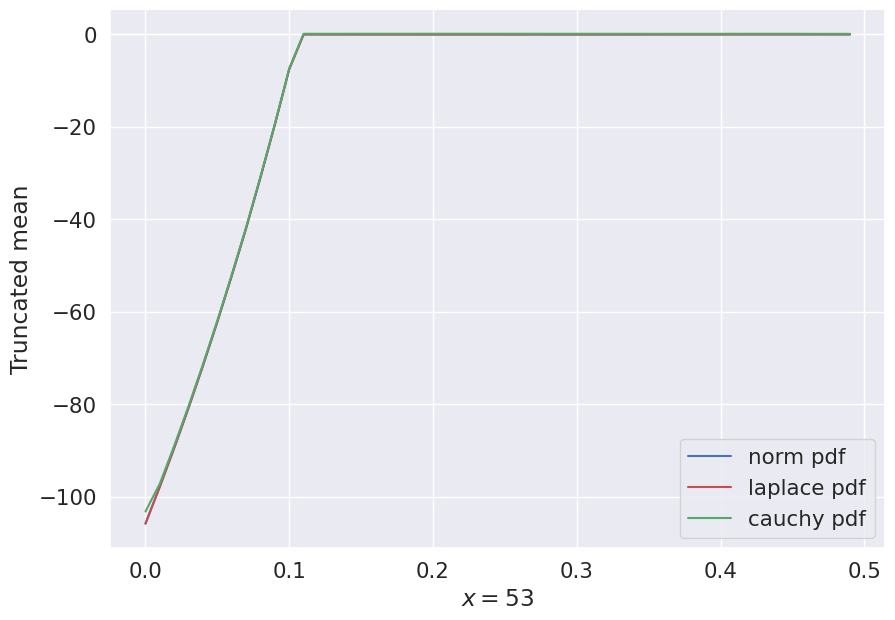

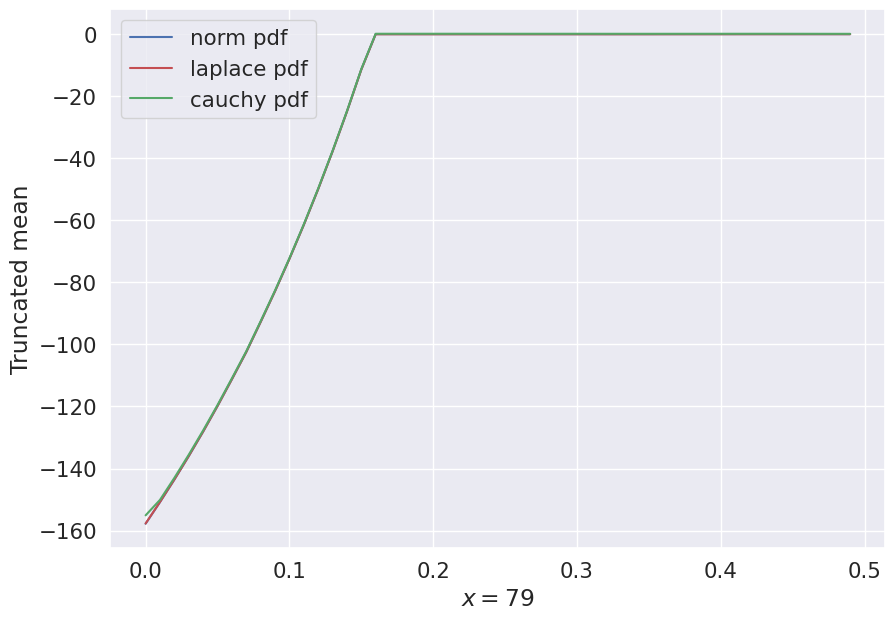

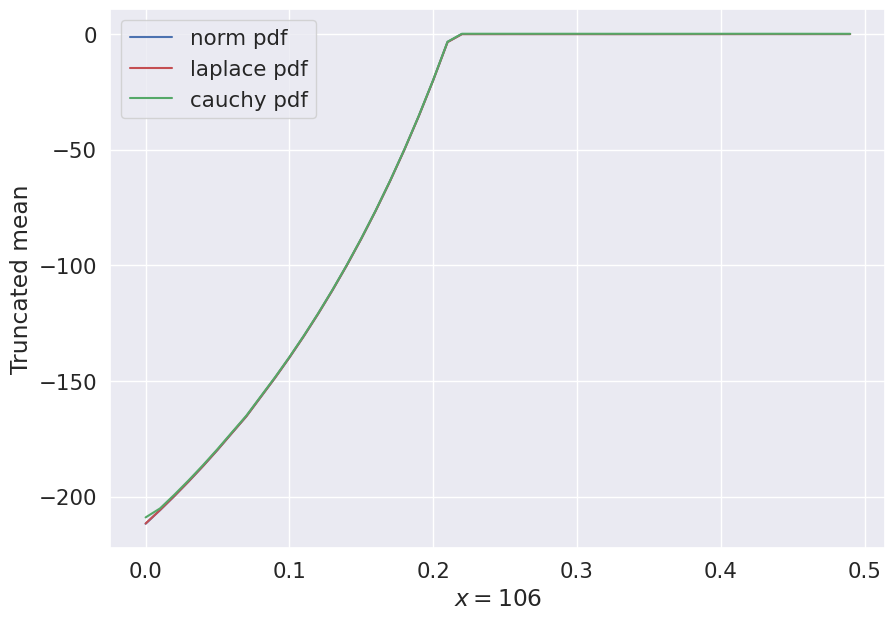

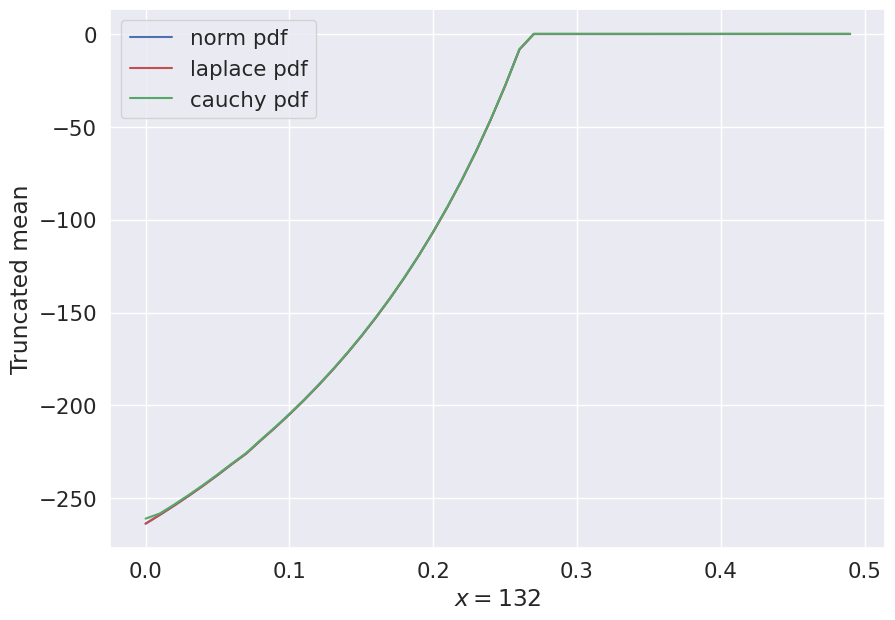

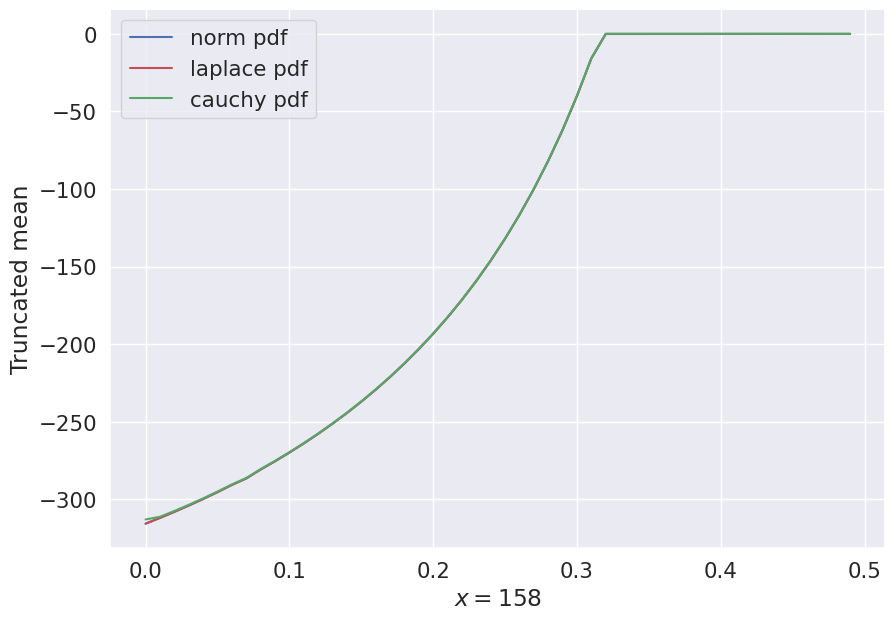

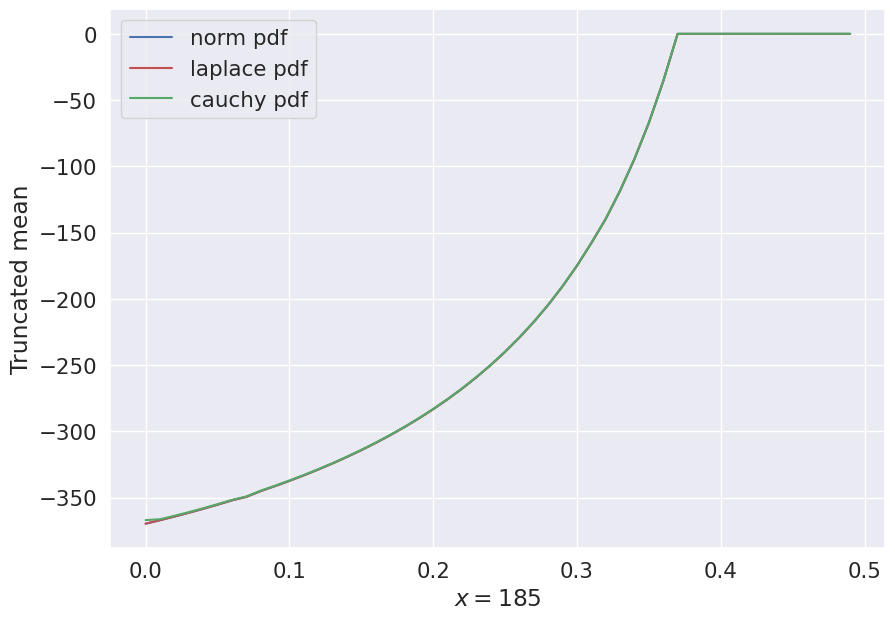

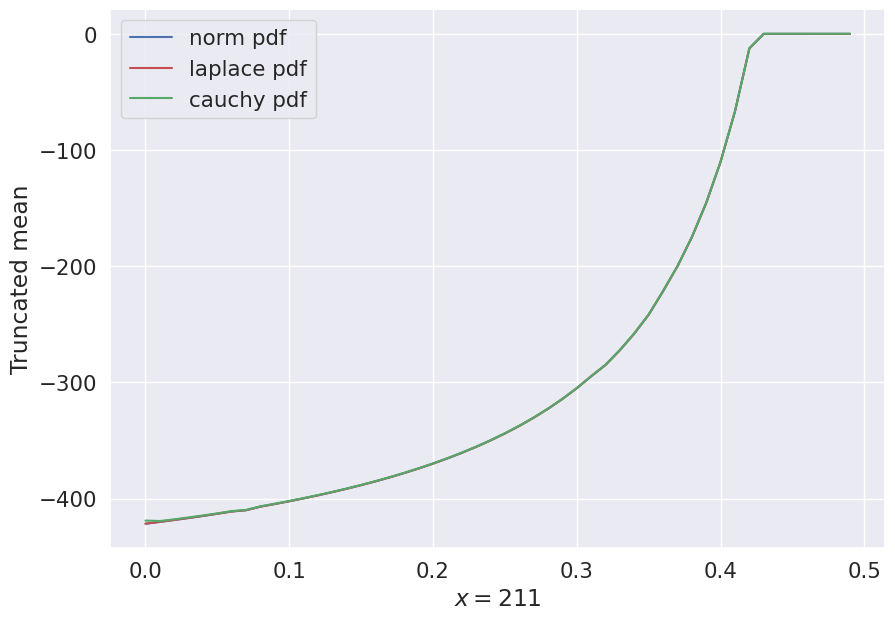

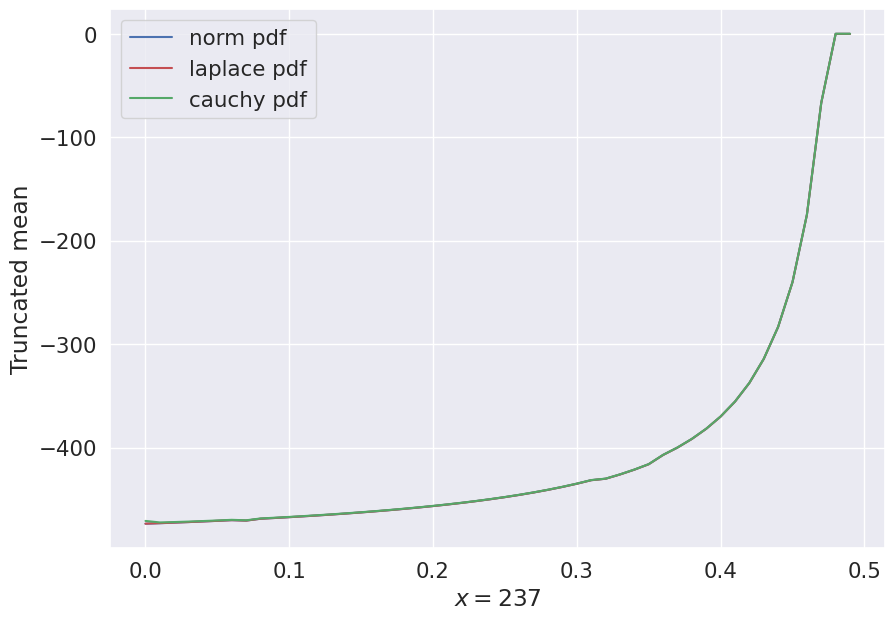

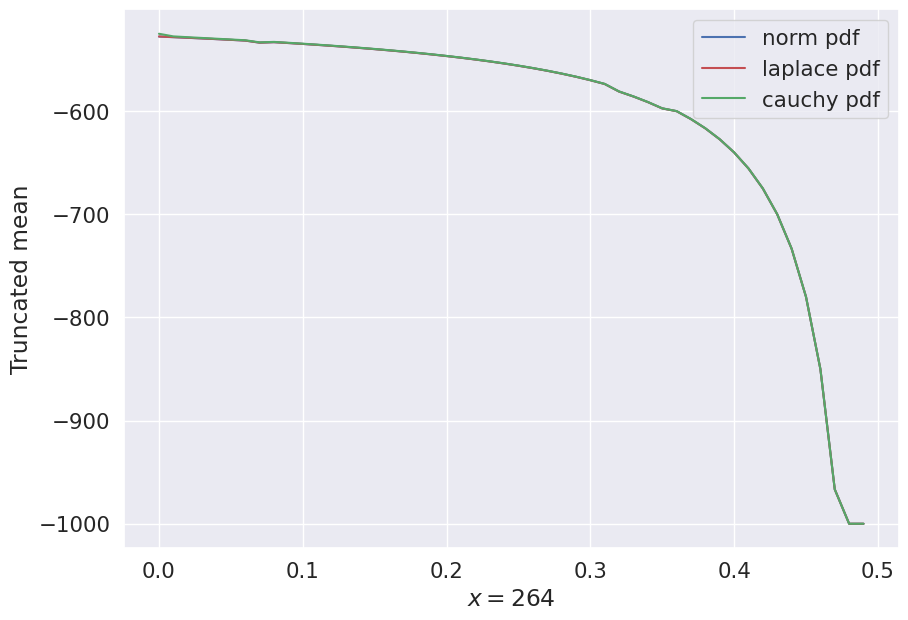

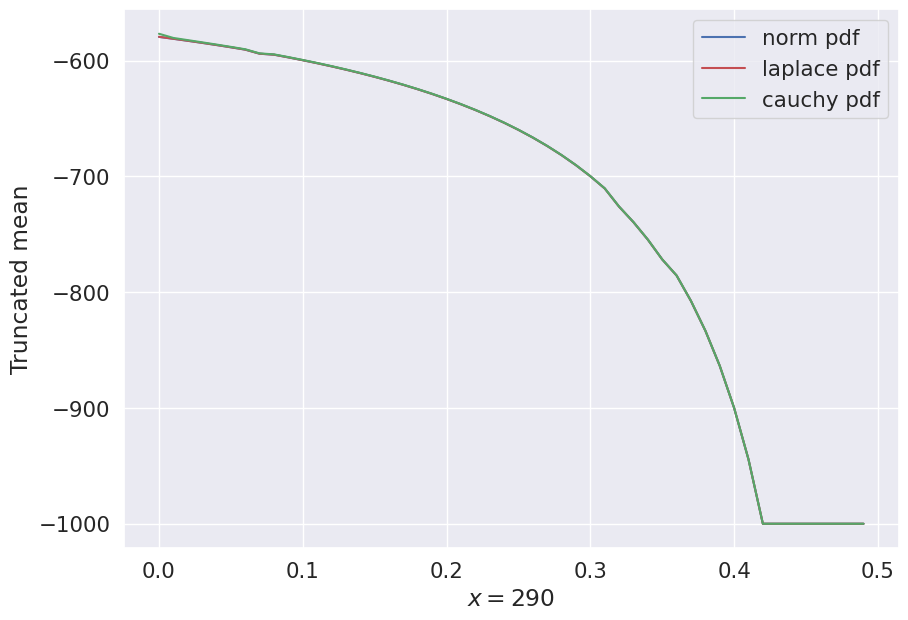

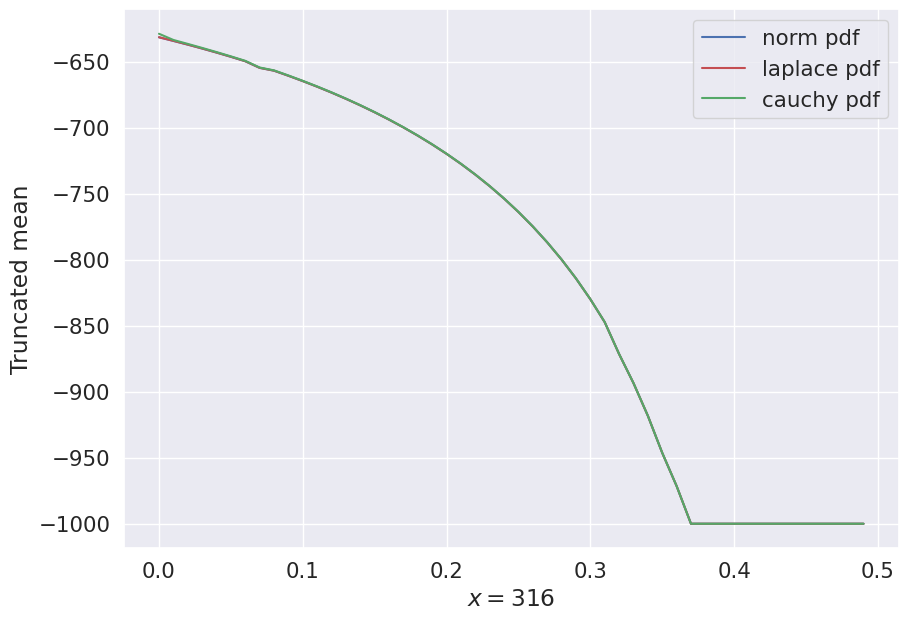

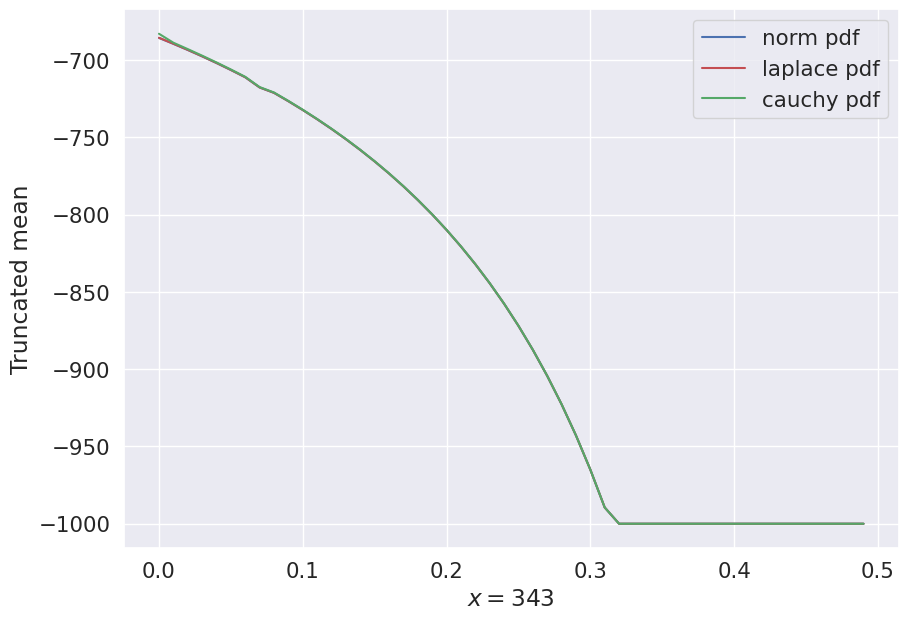

In [ ]:
for i in x:
  a = [num for j in range(int(i))]
  a = np.array(a)
  new_sample_normal = np.concatenate((a, sample_normal[int(i):]))
  new_sample_laplace = np.concatenate((a, sample_laplace[int(i):]))
  new_sample_cauchy = np.concatenate((a, sample_cauchy[int(i):]))
  alpha = np.arange(0, 0.5, 0.01)
  plt.figure(figsize=(10, 7))
  mean1 = []
  mean2 = []
  mean3 = []
  for j in alpha:
    mean1.append(truncated_mean(new_sample_normal, j))
    mean2.append(truncated_mean(new_sample_laplace, j))
    mean3.append(truncated_mean(new_sample_cauchy, j))
  plt.plot(alpha, mean1, color=normal_color, label='norm pdf')
  plt.plot(alpha, mean2, color=laplace_color, label='laplace pdf')
  plt.plot(alpha, mean3, color=cauchy_color, label='cauchy pdf')
  plt.xlabel(r'$x = $' + str(int(i)))
  plt.ylabel('Truncated mean')
  plt.legend()

Как мы видим из этих графиков, когда мы меняем незначительное число элементову нас сильно ухудшается оценка средним (в 0), но при этом все еще сохраняется хорошесть оценки медианой (в 0.5). Так происходит, так как наш параметр - 0 и распределение сосредоточено в основном около нуля, но мы заменяем (даже если очень маленькое) некоторое число элементов на -1000, в следствие чего оценка средним сразу же ломается, а оценка медианой не сломается, пока мы не заменим более половины элементов на -1000, что и просматривается на графиках.

7) Для каждого распределение на отдельном графике постройте значение трех оценок: среднего, медианы и усученного среднего порядка $0.35$. Для усеченного среднего проведите линию пунктиром (`fmt="--"`), для медианы точечками (`fmt=":"`). **Не забудьте про цвета**. То есть цвета на одном графике одинаковые, разные оценки отличает только формат линии.

**Ниже посчитайте все оценки необходимые для всех распределений**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

x = np.arange(0, N, 1)
alpha=0.35

norm_median = [np.median(sample_normal[:i]) for i in x]
laplace_median = [np.median(sample_laplace[:i]) for i in x]
cauchy_median = [np.median(sample_cauchy[:i]) for i in x]

norm_mean = np.cumsum(sample_normal) / x
laplace_mean = np.cumsum(sample_laplace) / x
cauchy_mean = np.cumsum(sample_cauchy) / x

norm_trunc_mean = [truncated_mean(sample_normal[:i], alpha) for i in x]
laplace_trunc_mean = [truncated_mean(sample_laplace[:i], alpha) for i in x]
cauchy_trunc_mean = [truncated_mean(sample_cauchy[:i], alpha) for i in x]

**Нормальное распределение**

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('Normal distriburion')
plt.plot(x, norm_median, ":", color=normal_color, label='median')
plt.plot(x, norm_mean, color=normal_color, label='mean')
plt.plot(x, norm_trunc_mean, "--", color=normal_color, label='truncated mean')
plt.xlabel('Размер выборки')
plt.ylabel('Estimation')
plt.legend()

**Распределение Лапласа**

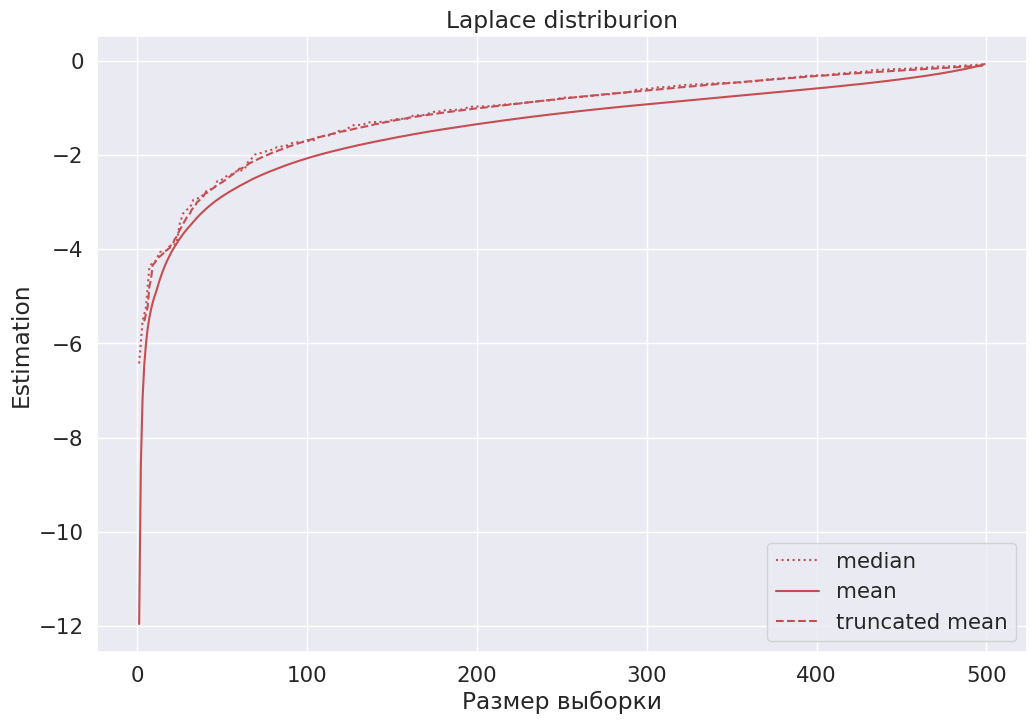

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('Laplace distriburion')
plt.plot(x, laplace_median, ":", color=laplace_color, label='median')
plt.plot(x, laplace_mean, color=laplace_color, label='mean')
plt.plot(x, laplace_trunc_mean, "--", color=laplace_color, label='truncated mean')
plt.xlabel('Размер выборки')
plt.ylabel('Estimation')
plt.legend()

**Распределение Коши**

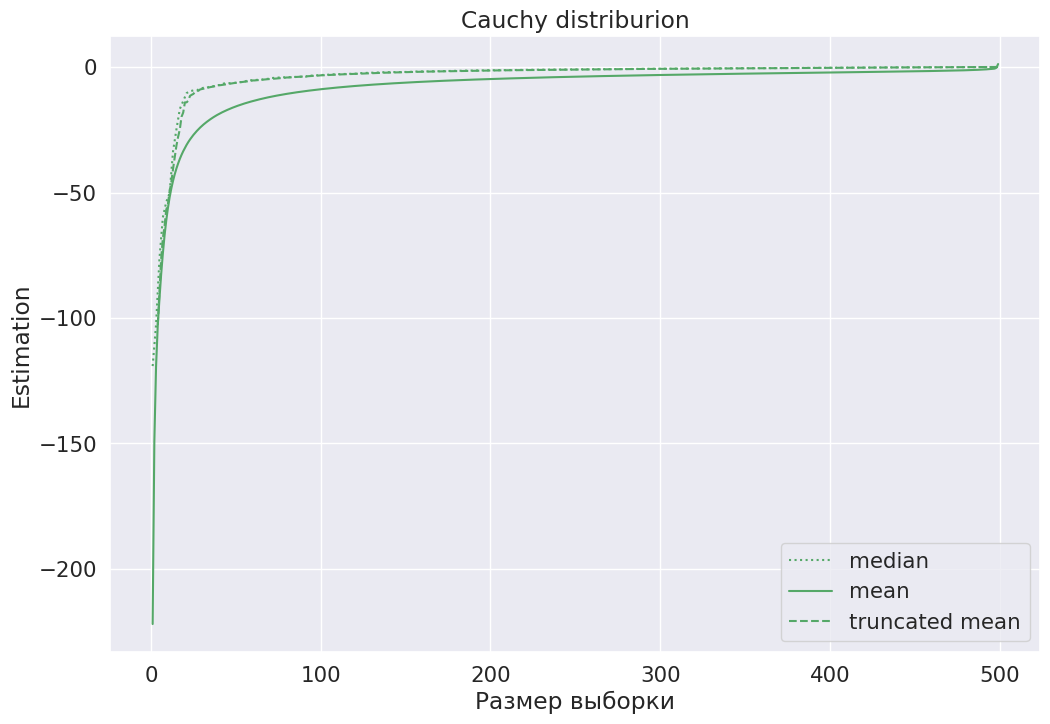

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('Cauchy distriburion')
plt.plot(x, cauchy_median, ":", color=cauchy_color, label='median')
plt.plot(x, cauchy_mean, color=cauchy_color, label='mean')
plt.plot(x, cauchy_trunc_mean, "--", color=cauchy_color, label='truncated mean')
plt.xlabel('Размер выборки')
plt.ylabel('Estimation')
plt.legend()

Проанализируйте полученные графики. Проанализируйте графики дисперсий оценок. Сделайте выводы.

Для всех трех распределений видим, что все три оценки сходится к 0, хотя для оценки средним распределения Коши сходимость и не такая хорошая. Усеченное среднее же везде хорошо сходится к 0. Значит наше предположение о 0.35 для распределение Коши и оценки усеченным средним оказалось верным выше.

**Опциональная часть для самых смелых (20 баллов)**

Мы знаем, что существует Оценка Максимального правдоподобия:

$\hat{\theta} = argmin_{\theta}(-log(f_{\theta}(x)))$, $f_{\theta}(x)$ --- правдоподобие выборки. В таком же виде можно выписать и оценки средним, медианой и усечённым средним:

$\hat{\theta} = argmin_{\theta}(\sum_{i=1}^n\rho(x_i - \theta))$.

В общем случае, такая оценка называется обобщённой оценкой максимального правдоподобия или $M$-оценкой. Функция $\rho$ называется функцией влияния.

1) Как должна выглядеть функция $\rho$, чтобы результатом было усечённое среднее?

Ответ:

2) Эквивалентно задачу оптимизации можно писать в виде системы уравнений $(\sum_{i=1}^n\psi(x_i - \theta)) = 0$. Сравните два определения и скажите, какое из них шире (определяет больше возможных оценок) и как они связаны.

Ответ:

3) Самое интересное. Для трёх распределений из первой части постройте M-оценки для разных функций $\rho$ или $\psi$. Ищите максимум градиентным спуском, а ноль функции --- методом Ньютона.

Примеры функций влияния можно взять вот тут: https://en.wikipedia.org/wiki/Robust_statistics#M-estimators

Ещё можно попросить в чате Том Древних Заклинаний (книжку по робастной статистике) и прочитать там главу 3, где есть примеры M- и L- оценок (что такое L-оценка при желании можете узнать там же сами)

4) Сравните результаты, полученные для трёх распределений и разных функций влияния.

5) Оцените Breakdown point предложенных функций. Сделайте вывод о том, как взаимосвязаны точность оценки и Breakdown point.

Сделайте единый вывод о робастном оценивании:

*Дисклеймер: * 20 баллов будет ставиться только в случае, если Вы попробуете хотя бы 5 существенно различающихся функций влияния и построите хотя бы одну L-оценку (без которой будет 15), а так же укажете, в каких оценках лучше точность и лучше Breakdown Point. В идеале нужно решить трейдофф между точностью и робастностью.

# Задача 2

## Wine dataset

Да, аспект-император взял с собой лучшее вино Трёх Морей и пьёт его, пока идёт битва! В этой задаче Вам предлагается поработать с реальными данными и провести оценивания состава вина.

Давайте загрузим и проанализируем датасет, состоящий из различных показателей для красного вина и оценок сомелье.

In [ ]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta

Downloading...
From: https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta
To: /content/winequality-red.csv
100% 101k/101k [00:00<00:00, 2.93MB/s]


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("winequality-red.csv")

In [ ]:
data.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

Поделите вина на три категории по содержанию алкоголя. Добавьте колонку `"category"` со значениями `"low alcohol"`, `"medium alcohol"`, `"high alcohol"` для относительного объемного содержания алкоголя `x<=10`, `10 < x <= 12`, `x > 12` соответственно.

In [ ]:
alcohol_in = [(data['alcohol'] <= 10),
              (data['alcohol'] <=12) & (data['alcohol'] > 10),
              (data['alcohol'] > 12)]
values = ['low alcohol', 'medium alcohol', 'high alcohol']
data['category'] = np.select(alcohol_in, values)

Для каждой категории посчитайте среднее и медиану содержания остаточного сахара (`"residual sugar"`). Сделайте pandas.DataFrame с индексами в виде категории содержания алкоголя и колнками в виде среднего и медианы.

In [ ]:
sugar_mean = []
sugar_median = []
for value in values:
    sugar_mean.append(data[data['category']==value]['residual sugar'].mean())
    sugar_median.append(data[data['category']==value]['residual sugar'].median())

new_data = pd.DataFrame(columns=['mean residual sugar', 'median residual sugar'],
                        index = values,
                        data = np.array([sugar_mean, sugar_median]).reshape(3, 2))

In [ ]:
new_data.head(5)

mean residual sugar  median residual sugar
low alcohol                2.445984               2.592264
medium alcohol             2.760993               2.100000
high alcohol               2.200000               2.300000

Что можно сказать о распределении сахара по этим категориям? О распределении остаточного сахара в целом?

**Ответ:** Почти у всех видов вин (по алкоголю) среднее и медиана содержания сахара примерно одинаковое, но вот у среднеалкогольного вина они достаточно сильно отличаются.

Постройте `boxplot` для остаточного сахара по категориям, полученным ранее на основании доли алкоголя.

<Axes: xlabel='category', ylabel='residual sugar'>

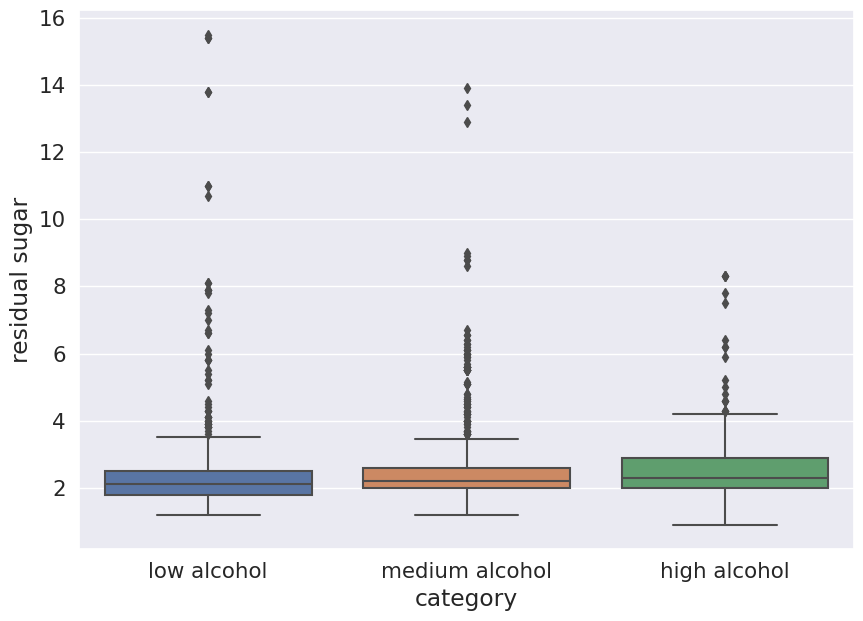

In [ ]:
palette = sns.color_palette("viridis", n_colors=3)[::-1]
plt.figure(figsize = (10, 7))
sns.boxplot(data, x='category', y='residual sugar')

Как соотнясятся оценки из предыдущего пункта и график сверху? Что лучше использовать для оценивания содержания сахара: медиану или среднее? Почему?

**Ответ:** Видим, что в данных имеется немалое количество выбросов (особенно для слабоалкогольного вина), поэтому оценка средним может быть сильно смещена и лучше будет использовать медиану. Также выбросами можно объяснить разнение оценок для среднеалкогольного вина, но тогда и для слабоалкогольного вина они должны бы были сильно разниться.

Проанализируйте обе выборки на предмет выбросов. Сколько их? Какую оценку параметра сдвига лучше использовать (считая обе выборки нормальными)?

Ответ: Выбросов почти нет только в высокоалкогольных винах, а в остальных двух категориях их немало. Поэтому лучше использовать оценку медианой, так как среднее может быть очень сильно смещено из-за выбросов (примерно то, что произошло с оценками после использования `Breakdown point` в задании 1.

Постройте один `scatterplot` (используйте `seaborn`) для очень хороших и очень плохих вин (`quality == 3`, `quality == 8`) в зависимости от содержания алкоголя (`alcohol` **не** из предыдущего пункта, а из колонки исходного датасета) и от количества лимонной кислоты (`citric acid`). Используйте `palette=[palette[0]]+[palette[-1]]`.

Text(0.5, 1.0, 'quality relied on citric acid with alcohol')

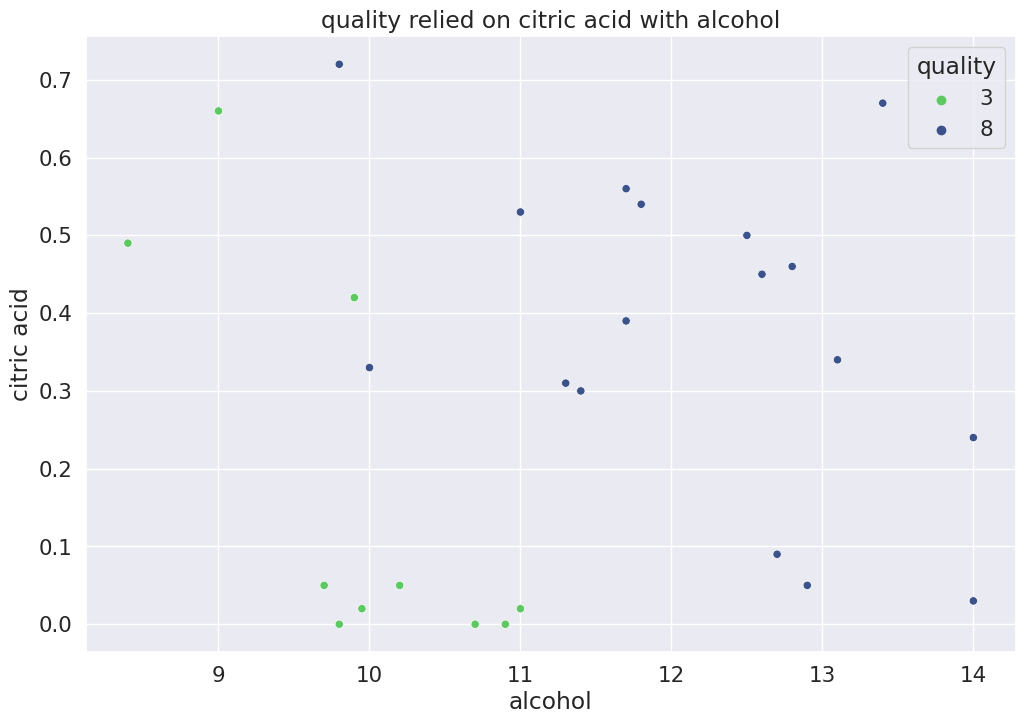

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data[(data['quality'] == 3) | (data['quality'] == 8)],
                x='alcohol',
                y='citric acid',
                hue= 'quality',
                palette=[palette[0]]+[palette[-1]])
plt.title('quality relied on citric acid with alcohol')

Найдите ОМП для двух этих распределений в предположении, что обе выбоки из многомерного нормального распределения. Не мудрите, $\mu$ и $\Sigma$ получаются в одну команду через `numpy`. Далее получите плотности для сетки `X`, `Y`. Используйте `sps.multivariate_normal`.

In [ ]:
mu3 = np.mean(data[data['quality'] == 3][['alcohol', 'citric acid']])
mu8 = np.mean(data[data['quality'] == 8][['alcohol', 'citric acid']])
sum3 = np.var(data[data['quality'] == 3][['alcohol', 'citric acid']])
sum8 = np.var(data[data['quality'] == 8][['alcohol', 'citric acid']])
rv3 = sps.multivariate_normal(mu3, sum3)
rv8 = sps.multivariate_normal(mu8, sum8)

Предложите свои робастные (устойчивые к выбросам) оценки параметров $\mu$, $\sigma$, посчитайте их. Сравните результат с ОМП. Какой оценке больше доверия?

Возьмем еще оценку медианой!

In [ ]:
median3 = np.median(data[data['quality'] == 3][['alcohol', 'citric acid']], axis = 0)
median8 = np.median(data[data['quality'] == 8][['alcohol', 'citric acid']], axis = 0)
rv_3 = sps.multivariate_normal(median3, sum3)
rv_8 = sps.multivariate_normal(median8, sum8)

Нарисуйте график плотности с линиями контура и нанесите точки выборки. Используйте зеленый цвет для вина плохого качества (`get_density_cmap("Greens")` и `"g"` для точек) и синий для вина хорошего качества (`get_density_cmap("Blues")` и `"b"`). Используйте функции `plt.pcolormesh`, `plt.clabel` и `plt.scatter`. Не забудьте про `plt.xlabel`, `plt.ylabel` и `plt.legend`.

In [ ]:
from matplotlib.colors import ListedColormap

def get_density_cmap(name):
    cmap =  plt.get_cmap(name)
    cmap_col = cmap(np.arange(cmap.N))
    cmap_col[:, -1] = np.linspace(0, 1, cmap.N)**2
    return ListedColormap(cmap_col)

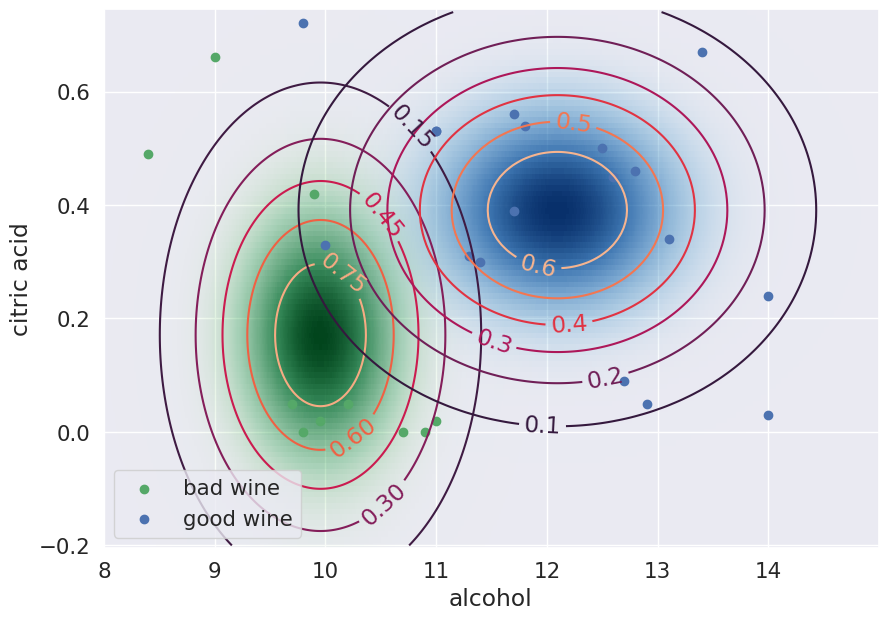

In [ ]:
x, y = np.mgrid[8:15:.01, -0.2:0.75:.01]
pos = np.dstack((x, y))
plt.figure(figsize=(10, 7))
data_poor = data[data['quality']==3]
data_good = data[data['quality']==8]
plt.pcolormesh(x, y, rv3.pdf(pos), cmap=get_density_cmap("Greens"))
plt.pcolormesh(x, y, rv8.pdf(pos), cmap=get_density_cmap("Blues"))
plt.scatter(data_poor['alcohol'], data_poor['citric acid'], color='g', label='bad wine')
plt.scatter(data_good['alcohol'], data_good['citric acid'], color='b', label='good wine')
plt.clabel(plt.contour(x, y, rv3.pdf(pos)))
plt.clabel(plt.contour(x, y, rv8.pdf(pos)))
plt.xlabel('alcohol')
plt.ylabel('citric acid')
plt.legend()

Теперь рассмотрим оценку медианой

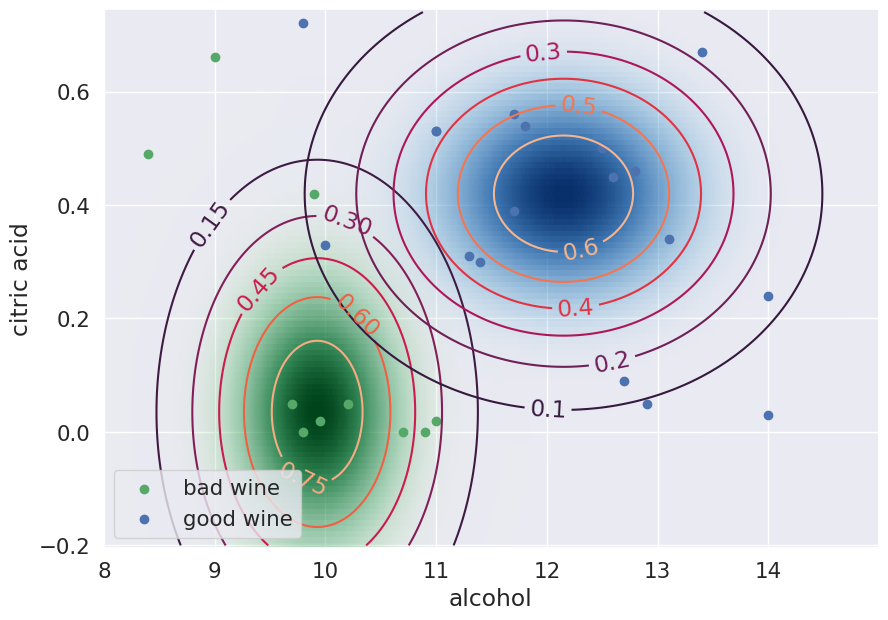

In [ ]:
x, y = np.mgrid[8:15:.01, -0.2:0.75:.01]
pos = np.dstack((x, y))
plt.figure(figsize=(10, 7))
data_poor = data[data['quality']==3]
data_good = data[data['quality']==8]
plt.pcolormesh(x, y, rv_3.pdf(pos), cmap=get_density_cmap("Greens"))
plt.pcolormesh(x, y, rv_8.pdf(pos), cmap=get_density_cmap("Blues"))
plt.scatter(data_poor['alcohol'], data_poor['citric acid'], color='g', label='bad wine')
plt.scatter(data_good['alcohol'], data_good['citric acid'], color='b', label='good wine')
plt.clabel(plt.contour(x, y, rv_3.pdf(pos)))
plt.clabel(plt.contour(x, y, rv_8.pdf(pos)))
plt.xlabel('alcohol')
plt.ylabel('citric acid')
plt.legend()

Что можно сказать о вине, которому сомелье дали наивысший балл по сравнению с вином, которому дали наименьший балл, основываясь на график выше?

**Ответ:** Как можно увидеть, в хорошем вине больше содержание лимонной кислоты и алкоголя, по сравнению с плохим. Также сложно сказать, хуже ли оценка медианой, чем оценка методом максимального правдоподобия, так как картинки получились практически одинаковыми, за исключением того, что картинка для оценки медианой чуть-чуть сдвинута вниз (по сравненю с первой).

# Задача 3

В случаях, когда ошибка в значении параметра может дорого обойтись, применяют доверительное оценивание. Вместо точечного значения параметра оценкой является отрезок, в который истинное значение параметра попадает с высокой вероятностью.

Сгенерируйте выборку $X_1, ...,X_{100}$ из распределения $P_\theta$.

Для уровня доверия $\alpha = 0.95$ для всех $n \leq 100$
изобразите на графиках в координатах $(n, \theta)$
* Доверительный интервал, построенный по оценке $\widehat{\theta}$ (который, помимо этого, нужно теоретически посчитать и написать)
* График оценки $\widehat{\theta}$
* Точки выборки

Для отрисовки доверительного интервала используйте `plt.fill_between`. Не забывайте про параметр `alpha`.

Для того, чтобы избежать дублирования кода, рекомендуем написать функцию `draw_confidence_interval`, изображающую на графике все необходимое.

В каждом случае при помощи моделирования проверьте, как часто параметр действительно попадает в свой доверительный интервал (генерируйте выборку выборок, по которой стройте выборку доверительных интервалов)

In [ ]:
N = 100
alpha = 0.95
def draw_confidence_interval(sample, interval, theta_hat, N, ogr=0):
  n = np.arange(1, N + 1, 1)
  plt.figure(figsize=(10, 7))
  plt.fill_between(x=n[ogr:], y1=interval[0][ogr:], y2=interval[1][ogr:], alpha = 0.5, label='Interval')
  plt.scatter([0 for i in range(len(sample))], sample, alpha = 0.5, label='Sample')
  plt.plot(n, theta_hat, label='Estimation')
  plt.xlabel('Sample size')
  plt.ylabel('Sample values')
  plt.title(r'Confidence interval and $\theta$ estimation vs sample size')
  plt.legend()

### 1. Равномерное распределение, $\theta = 10$, оценка $\widehat{\theta} = X_{(n)}$

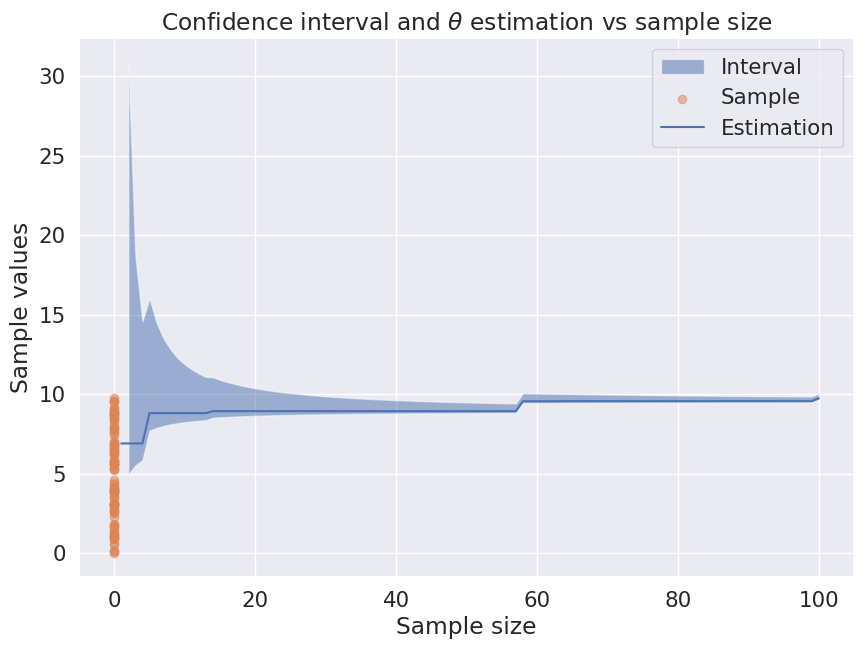

In [ ]:
theta = 10
n = np.arange(1, N + 1, 1)
sample = sps.uniform(scale=theta).rvs(size=N)
theta_hat = np.maximum.accumulate(sample)
interval = [theta_hat / (1 + alpha) ** (1 / n), theta_hat / (1 - alpha) ** (1 / n)]
draw_confidence_interval(sample, interval, theta_hat, N, 1)

### 2. Распределение Коши, $\theta = 10$, оценка — медиана

В силу того, что распределение Коши не имеет мат. ожидания, для него сложно построить по честному доверительный интервал. Поэтому мы будем строить ассимптотический доверительный интервал.

(2.0, 25.0)

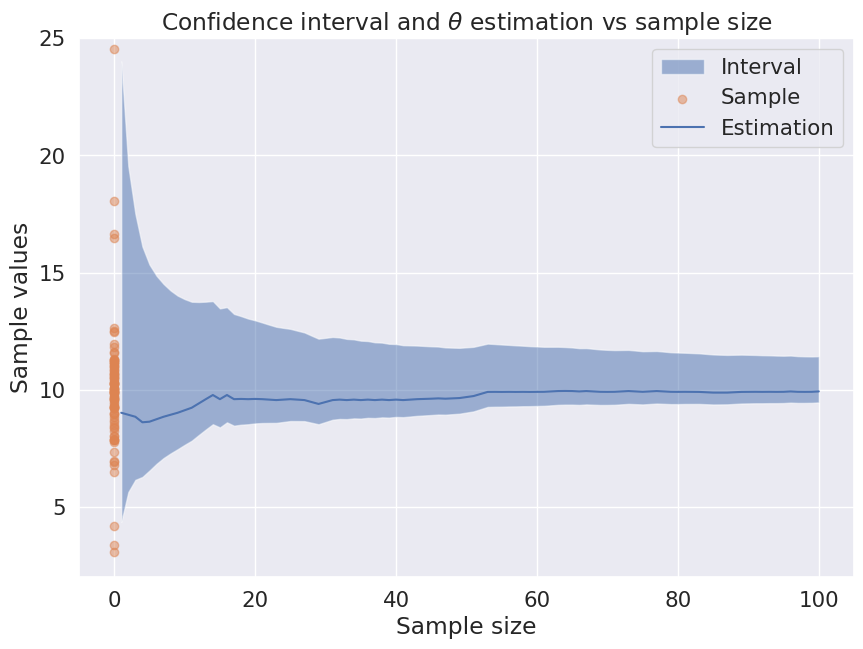

In [ ]:
sample = sps.cauchy(loc=theta).rvs(size=N)
theta_hat = [np.median(sample[:i]) for i in range(1, N + 1, 1)]
interval = [theta_hat - sps.cauchy(loc=theta).ppf((1 + alpha) / (2 * np.pi)) / (2 * np.sqrt(np.arange(1, N + 1, 1))), theta_hat - sps.cauchy(loc=theta).ppf((1 - alpha) / (2 * np.pi)) / (2 * np.sqrt(np.arange(1, N + 1, 1)))]
draw_confidence_interval(sample, interval, theta_hat, N)
plt.ylim([2, 25])

### 3. Распределение Пуассона, $\theta = 10$, оценка $\widehat{\theta} = \overline{X}$

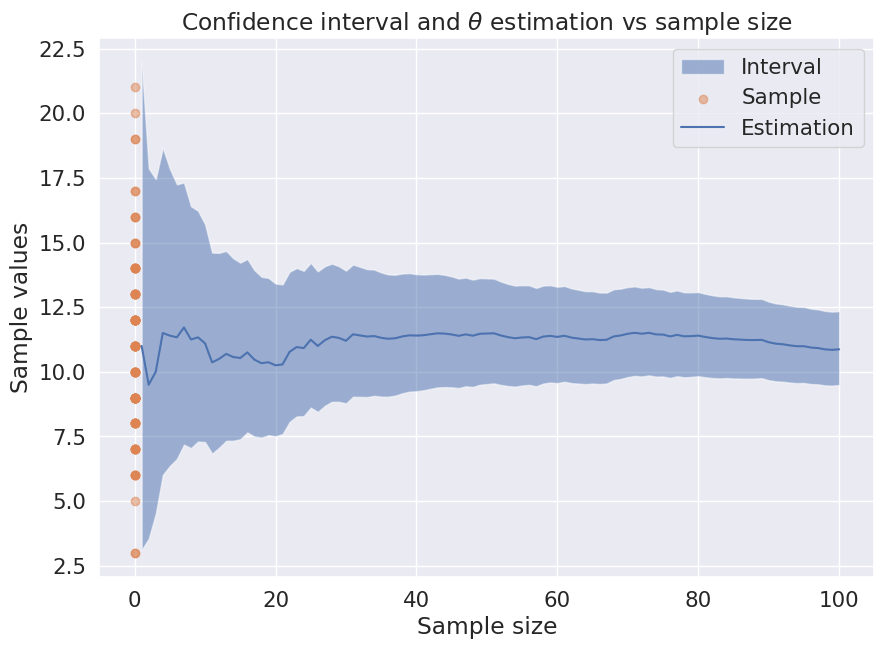

In [ ]:
sample = sps.poisson(theta).rvs(size=N)
theta_hat = np.cumsum(sample) / n
conf_interval = [(np.sqrt(theta_hat + 1 / (4 * (1 - alpha) * n)) - np.sqrt(1 / (4 * (1 - alpha) * n))) ** 2,
                (np.sqrt(theta_hat - 1 / (4 * (1 - alpha) * n)) + np.sqrt(1 / (4 * (1 - alpha) * n))) ** 2]
draw_confidence_interval(sample, conf_interval, theta_hat, N)

### 4. Гамма-распределение, $(\theta, \lambda) = (10, 3)$, $\lambda$ известна

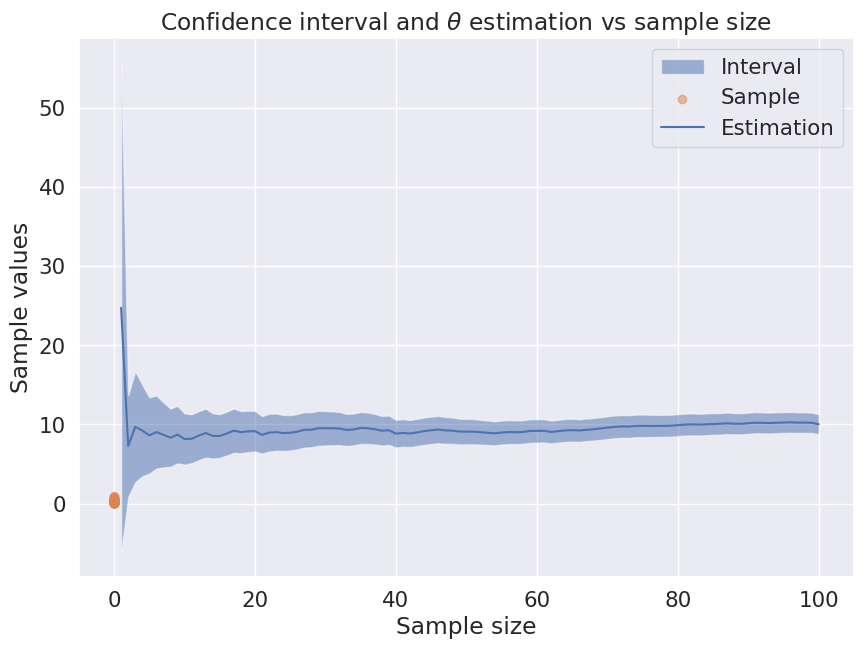

In [ ]:
lamda = 3
sample = sps.gamma(lamda, scale=1 / theta).rvs(size=N)
theta_hat = lamda / (np.cumsum(sample) / n)
conf_interval = [theta_hat - sps.gamma(lamda, scale=1 / theta).ppf((1 + alpha) / 2) * theta_hat / np.sqrt(n) * np.sqrt(lamda)
               , theta_hat + sps.gamma(lamda, scale=1 / theta).ppf((1 + alpha) / 2) * theta_hat / np.sqrt(n) * np.sqrt(lamda)]
draw_confidence_interval(sample, conf_interval, theta_hat, N)

Сделайте вывод о том, насколько точен доверительный интервал в каждом случае? Насколько он широк? А что от него ожидается: быть шире или быть уже? От каких свойств распределения зависит ширина?

Вывод: По графикам видно, что в общем случае доверительный интервал покрывает намного большую площадь, чем сама выборка, но при этом зачастую почти все значения элементов выборки попадают в доверительный интервал уровня 0.95. А значит мы проверили теорию на практике. Кажется, что хотелось бы, чтобы для гамма-распределения он был уже, а для равномерного распределения шире, тогда для второго количество попаданий увеличилось бы в разы.

### Задача 4.

Точный доверительный интервал в условиях войны с чудовищами консульта строить нет ни времени, ни желания. Зато у нас есть целых два кандидата на его место: маги с востока предлагают использовать асимптотический доверительный интервал, как завещал их философ Айенсис, а маги с запада --- бутстрепный, как написано в их священных текстах. А какой лучше?

В этой задаче мы построим точный, асимптотический и бутстрепный доверительный интевалы для нормального распределения и сравним их.

Пусть $X_1, \dots, X_n$ — выборка из нормального распределения со средним $a$ и дисперсией $\sigma^2$, причем $\sigma$ неизвестна. Выпишите формулы

* точного доверительного итервала уровня доверия $\alpha$ для $a$:

* асимптотического доверительного итервала уровня доверия $\alpha$ для $a$

* бутстрепного доверительного итервала уровня доверия $\alpha$ для $a$


**Точный доверительный интервал:**
$$x \in \left(\overline{X} - \frac{ z_{\frac{\alpha + 1}{2}}}{\sqrt{n}}s, \overline{X} + \frac{z_{\frac{\alpha + 1}{2}}}{\sqrt{n}}s\right),$$
где $z_\alpha$ - квантиль распределения Стьюдента, $s = \sqrt{\frac{1}{n - 1}\sum{(X - \overline{X})^2}}$ - выборочная дисперсия

**Aсимтотический доверительный интервал:**
$$x \in \left(\overline{X} - \frac{z_{\frac{\alpha + 1}{2}}}{\sqrt{n}}s, \overline{X} + \frac{z_{\frac{\alpha + 1}{2}}}{\sqrt{n}}s \right),$$
где $z_\alpha$ - квантиль нормального распределения

**Бутстрепный доверительный интервал:**
$$
x \in \left(\overline{X} - z_{\frac{\alpha + 1}{2}} ⋅ \sqrt{\hat{v}_{boot}}, \overline{X} + z_{\frac{\alpha + 1}{2}} ⋅ \sqrt{\hat{v}_{boot}} \right)
$$, где $\hat{v}_{boot}$ - бутстрепная оценка дисперсии.

Для $n=30, \,a = 0$ постройте __на одном графике__ все три доверительных интервала, а также отметьте линией истинное значение $a$.

In [ ]:
def calculate_1(sample, alpha=0.95):
  size = len(sample)
  distr = sps.t(size - 1)
  mean = np.mean(sample)
  var = np.sqrt(1 / (size - 1) * np.sum((sample - mean) ** 2))
  return [mean - distr.ppf((alpha + 1) / 2) / np.sqrt(size) * var, mean + distr.ppf((alpha + 1) / 2) / np.sqrt(size) * var]
def calculate_2(sample, alpha=0.95):
  size = len(sample)
  distr = sps.norm()
  mean = np.mean(sample)
  var = np.sqrt(1 / (size - 1) * np.sum((sample - mean) ** 2))
  return [mean - distr.ppf((alpha + 1) / 2) / np.sqrt(size) * var, mean + distr.ppf((alpha + 1) / 2) / np.sqrt(size) * var]

Моделированием посчитайте вероятность того, что истинное значение параметра попадёт в интервал. В каком случае оно ближе к теоретическому (среди двух неточных интервалов)?

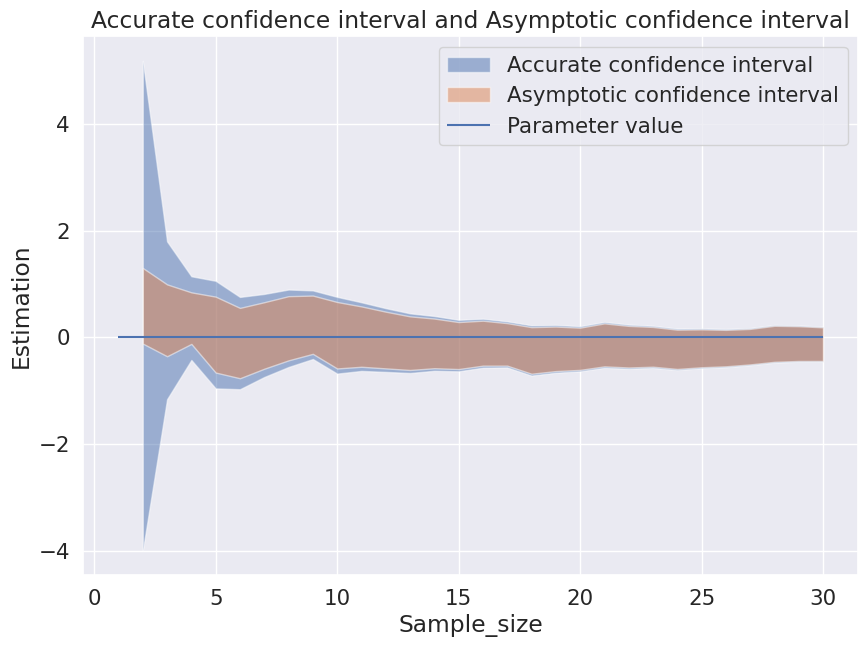

In [ ]:
n = 30
a = 0
sample = sps.norm(loc = a, scale = 1).rvs(size = n)
intervals_1 = []
intervals_2 = []
intervals_3 = []
intervals_4 = []
for i in range(2, n + 1):
  interval_1 = calculate_1(sample[:i])
  interval_2 = calculate_2(sample[:i])
  intervals_1.append(interval_1[0])
  intervals_2.append(interval_1[1])
  intervals_3.append(interval_2[0])
  intervals_4.append(interval_2[1])
plt.figure(figsize=(10, 7))
plt.fill_between(x=np.arange(2, n + 1, 1), y1=intervals_1, y2=intervals_2, alpha=0.5, label='Accurate confidence interval')
plt.fill_between(x=np.arange(2, n + 1, 1), y1=intervals_3, y2=intervals_4, alpha=0.5, label='Asymptotic confidence interval')
plt.hlines(a, xmin=1, xmax=n, label='Parameter value')
plt.xlabel('Sample_size')
plt.ylabel('Estimation')
plt.title('Accurate confidence interval and Asymptotic confidence interval')
plt.legend()

Сделайте вывод о том, когда какой интервал использовать и как их использовать, чтобы получить хороший результат.

Вывод: На малом размере выборки, как видно из графика, точный доверительный интервал лучше попадает в истинное значение параметра и при этом покрывает собой большую область, в то время, как при разных запусках одного и то го же кода, асимптотический доверительный интервал может даже не содержать истинного значения параметра. При этом, при увеличении размера выборки ситуация становится лучше: асимптотический интервал начинает себя вести, как точный.

## Задача 5

И снова, реальные данные.

В этой задаче мы проанализируем изменение индекса качества воздуха (air quality index, AQI) для двух мегаполисов Индии за последние годы. Данные взяты с Kaggle (https://www.kaggle.com/rohanrao/air-quality-data-in-india)

In [ ]:
!gdown 1DE7zVPsfSk8hyEdWRf4WPr3I0w5GUOpp

Downloading...
From: https://drive.google.com/uc?id=1DE7zVPsfSk8hyEdWRf4WPr3I0w5GUOpp
To: /content/city_day.csv
100% 2.57M/2.57M [00:00<00:00, 18.5MB/s]


Загрузите файл `city_day.csv`. Нам понадобятся столбцы `City`, `Date` и `AQI`. При этом учтите, что:
* В дальнейшем мы будем работать с датами, поэтому используйте аргумент `parse_dates` чтобы корректо их распарсить
* Данные содержат пропуски, которые нужно удалить

Для удобства сохраните в отдельные поля `Month` и `Year` соответственно год и месяц, когда производились замеры

Нас будут интересовать два города: Мумбаи (Mumbai) и Калькутта (Kolkata). Сохраните данные по этим двум городам для всех днней с 1 июля 2018 года включительно

In [ ]:
import pandas as pd
data = pd.read_csv('city_day.csv', usecols=['City', 'Date', 'AQI'], parse_dates=['Date'])
data = data.dropna()
data_day_month = pd.DataFrame({'Year' : data['Date'].dt.year, 'Month' : data['Date'].dt.month})
newdata = data.join(data_day_month)
Mumbai = newdata[(newdata['City'] == 'Mumbai') &
               (newdata['Date'] >= pd.Timestamp(2018, 6, 1))]
Kolkata = newdata[(newdata['City'] == 'Kolkata') &
               (newdata['Date'] >= pd.Timestamp(2018, 6, 1))]

В предыдущих задачах мы строили доверительные интервалы в предположении, что выборка взята из параметрического семейства распределений. Но что делать в случае, когда подобное предположение сделать нельзя? Оказывается, в этом случае можно строить доверительный интервал с помощью бутстрепа.

Пусть $X_1, \dots, X_n$ — выборка, для которой мы хотим оценить некоторую величину $\theta$. Построим $k$ бутстепных выборок, и получим по ним оценки $\theta^*_1, \dots, \theta^*_k$. Отсортируем их, чтобы получить вариационный ряд $\theta^*_{(1)}, \dots, \theta^*_{(k)}$. Тогда получим, что
$$
C^* = \left(\theta^*_{(\lfloor k (1 + \alpha) / 2 \rfloor)},
\theta^*_{(\lceil k (1 - \alpha) / 2 \rceil)} \right)
$$
будет (приблизительным) доверительным интервалом для $\theta$ уровня доверия $\alpha$.

In [ ]:
def data_by_month_year(data, year, month):
    return data[(data['Month'] == month) & (data['Year'] == year)]
def bootstrap_sample(sample, k = 500):
  return np.random.choice(sample, (k, len(sample)))

Для каждого месяца с июля 2018 по июнь 2020 включтельно постройте бутстрепный доверительный интервал для __среднего значения AQI__. В этом вам помогут следующие вспомогательные функции:

In [ ]:
def bootstrap_interval(sample, alpha=0.95):
  theta_hat = np.mean(sample, axis=1)
  theta_hat = np.sort(theta_hat)
  return [theta_hat[int(np.floor(np.size(theta_hat) * (1 - alpha) / 2))], theta_hat[int(np.ceil(np.size(theta_hat) * (1 + alpha) / 2))]]

In [ ]:
Mumbai_interval = np.array([]).reshape(0, 2)
Kolkata_interval = np.array([]).reshape(0, 2)
date = []
for per in (pd.period_range(start='2018-07',end='2020-07', freq='M')):
  date.append((per.month, per.year))
date = tuple(date)
mean_1 = []
mean_2 = []
for month, year in date:
  date_1 = data_by_month_year(Mumbai, year, month)
  date_2 = data_by_month_year(Kolkata, year, month)
  Mumbai_samples = bootstrap_sample(date_1['AQI'])
  Kolkata_samples = bootstrap_sample(date_2['AQI'])
  Mumbai_interval = np.vstack((Mumbai_interval, bootstrap_interval(Mumbai_samples)))
  Kolkata_interval = np.vstack((Kolkata_interval, bootstrap_interval(Kolkata_samples)))
  mean_1.append(date_1['AQI'].mean())
  mean_2.append(date_2['AQI'].mean())

Постройте на одном графике доверительные интервалы для Мумбаи и Калькутты. Также отметьте точками на графике истинный средний AQI и соедините точки линиями. Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

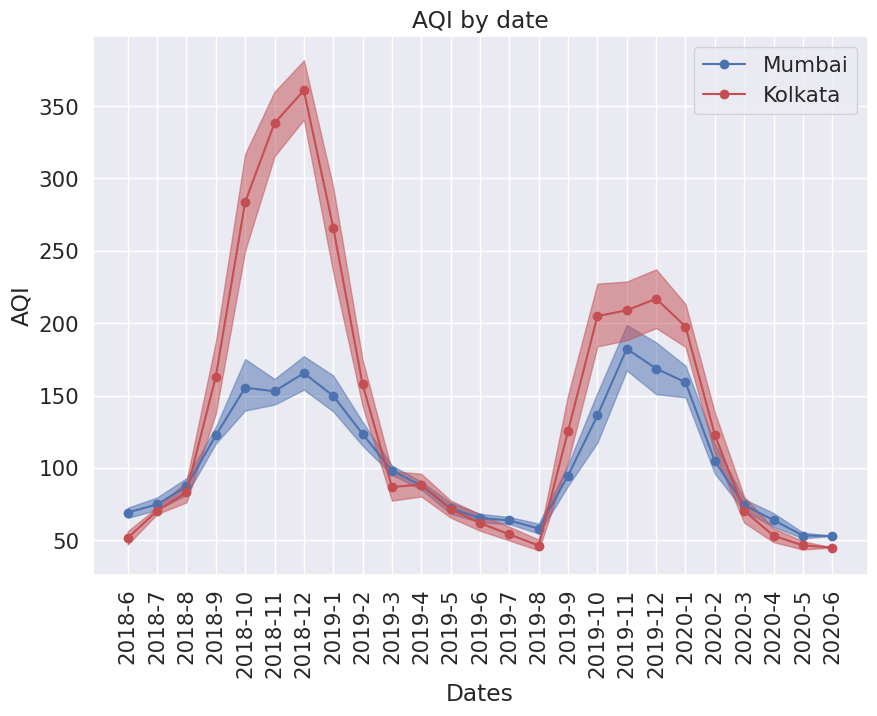

In [ ]:
Mumbai_new = Mumbai[['Year', 'Month']].drop_duplicates().values[:-1]
ns = np.arange(0, np.size(Mumbai_new, axis = 0))

plt.figure(figsize=(10, 7))
plt.plot(ns, mean_1, color='b', marker='o', label='Mumbai')
plt.fill_between(ns, Mumbai_interval[:, 0], Mumbai_interval[:, 1], color='b', alpha=0.5)
plt.plot(ns, mean_2, color='r', marker='o', label='Kolkata')
plt.fill_between(ns, Kolkata_interval[:, 0], Kolkata_interval[:, 1], color='r', alpha=0.5)
plt.xticks(ns, [f"{year}-{month}" for year, month in Mumbai_new], rotation='vertical')
plt.xlabel('Dates')
plt.ylabel('AQI')
plt.title('AQI by date')
plt.legend()

Посмотрите на получившийся график. Видны ли в нем какие-либо закономерности? С чем они могут быть связаны?

По этим графикам видно, пик загрязнения в городах - между декабрем и январем, но при этом очевидно видно, что загрязнение воздуха растет в осень и зиму и становится меньше весной и летом. Если рассуждать чисто географически, то это города Индии, в которых в это время года наблюдается сильная засуха, что может приводить к пожарам, испарению воды (возможно загрязненной) и т.д., что и приводит к загрязнению воздуха.

Теперь давайте сравним качество воздуха в апреле 2019 и апреле 2020 годов. Постройте __на одном графике__
* доверительные интервалы для апреля 2019 и апреля 2020 для Мумбаи
* истинные средние значения (с помощью `plt.hlines`)
* точки выборки

Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

То же самое сделайте для Калькутты.

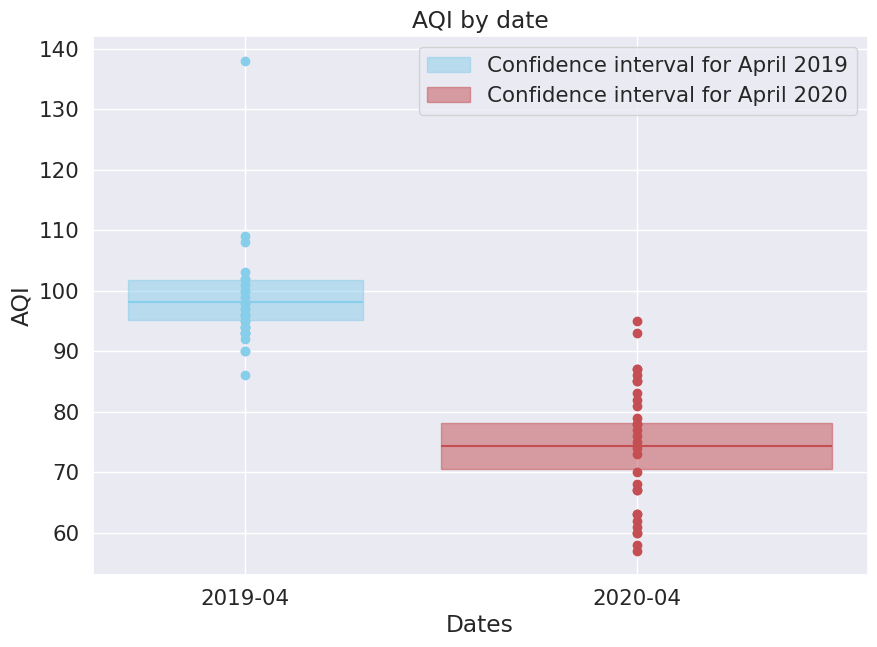

In [ ]:
data_1 = data_by_month_year(Mumbai, 2019, 4)['AQI']
data_2 = data_by_month_year(Mumbai, 2020, 4)['AQI']
interval_1 = bootstrap_interval(bootstrap_sample(data_1))
interval_2 = bootstrap_interval(bootstrap_sample(data_2))
plt.figure(figsize=(10, 7))
plt.fill_between([-0.3, 0.3], interval_1[0], interval_1[1], alpha=0.5, color='skyblue'
               , label='Confidence interval for April 2019')
plt.hlines(data_1.mean(), xmin=-0.3, xmax=0.3, color='skyblue')
plt.scatter([0] * np.size(data_1), data_1, color='skyblue')

plt.fill_between([0.5, 1.5], interval_2[0], interval_2[1], alpha=0.5, color='r'
               , label='Confidence interval for April 2020')
plt.hlines(data_2.mean(), xmin=0.5, xmax=1.5, color='r')
plt.scatter([1] * np.size(data_2), data_2, color='r')

plt.xticks([0, 1], ['2019-04', '2020-04'], rotation='horizontal')
plt.xlabel('Dates')
plt.ylabel('AQI')
plt.title('AQI by date')
plt.legend()

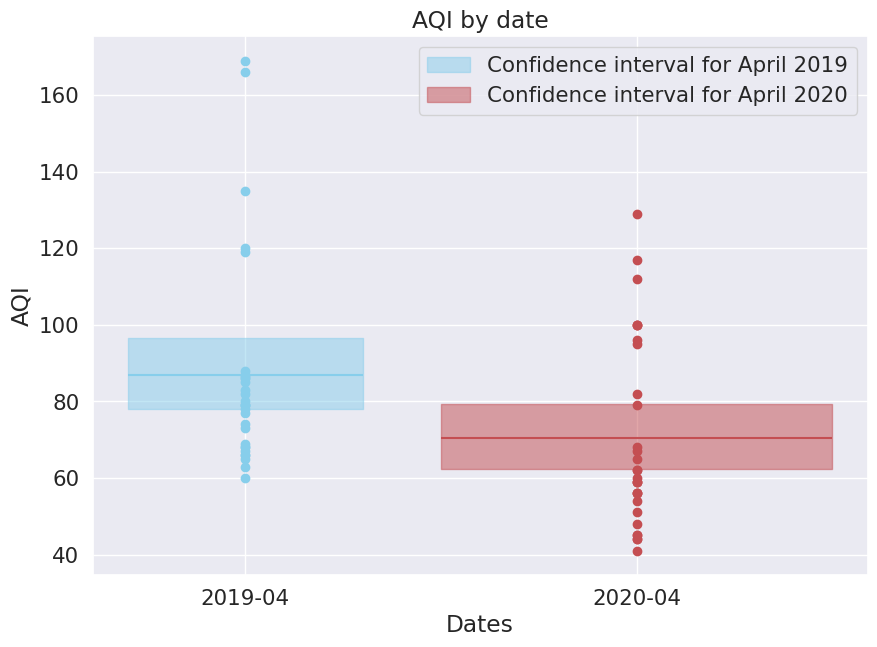

In [ ]:
data_1 = data_by_month_year(Kolkata, 2019, 4)['AQI']
data_2 = data_by_month_year(Kolkata, 2020, 4)['AQI']
interval_1 = bootstrap_interval(bootstrap_sample(data_1))
interval_2 = bootstrap_interval(bootstrap_sample(data_2))
plt.figure(figsize=(10, 7))
plt.fill_between([-0.3, 0.3], interval_1[0], interval_1[1], alpha=0.5, color='skyblue'
               , label='Confidence interval for April 2019')
plt.hlines(data_1.mean(), xmin=-0.3, xmax=0.3, color='skyblue')
plt.scatter([0] * np.size(data_1), data_1, color='skyblue')

plt.fill_between([0.5, 1.5], interval_2[0], interval_2[1], alpha=0.5, color='r'
               , label='Confidence interval for April 2020')
plt.hlines(data_2.mean(), xmin=0.5, xmax=1.5, color='r')
plt.scatter([1] * np.size(data_2), data_2, color='r')

plt.xticks([0, 1], ['2019-04', '2020-04'], rotation='horizontal')
plt.xlabel('Dates')
plt.ylabel('AQI')
plt.title('AQI by date')
plt.legend()

Сделайте выводы. Что можно сказать про доверительные интервалы в каждом из случаев? Какие прикладные выводы о загрязнении воздуха можно сделать из Ваших результатов?

**Вывод:** Посмотрев на график Мумбаи, видим, что доверительный интервал в 2020 году получается немного шире, чем в 2019, что можно объяснить большим отклонением элементов выборки от их среднего. В 2020 году видим два небольших выброса, а в 2019 году явный выброс, в остальном все значения лежат в пределах допустимого. В Калькутте видно, что ширина доверительного интервала в 2019 году чуть-чуть больше, но при этом в обоих годах видны явные выбросы.